In [1]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold 
#from sklearn.linear_model import Ridge
#from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import FunctionTransformer
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LassoCV
#from sklearn.datasets import make_regression
from sklearn import svm
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset



import seaborn as sb

#device = 'cpu'



Data to Numpy

In [2]:
train_feat100 = pd.read_csv(r'C:\Users\erics\Documents\Programme\IntroML\Task4\task4_hr35z9\train_features.csv')
train_labels100 = pd.read_csv(r'C:\Users\erics\Documents\Programme\IntroML\Task4\task4_hr35z9\train_labels.csv')
pretrain_feat = pd.read_csv(r'C:\Users\erics\Documents\Programme\IntroML\Task4\task4_hr35z9\pretrain_features.csv')
pretrain_labels = pd.read_csv(r'C:\Users\erics\Documents\Programme\IntroML\Task4\task4_hr35z9\pretrain_labels.csv')

test_feat = pd.read_csv(r'C:\Users\erics\Documents\Programme\IntroML\Task4\task4_hr35z9\test_features.csv')

In [3]:
test_feat

,Id,smiles,feature_0000,feature_0001,feature_0002,feature_0003,feature_0004,feature_0005,feature_0006,feature_0007,...,feature_0990,feature_0991,feature_0992,feature_0993,feature_0994,feature_0995,feature_0996,feature_0997,feature_0998,feature_0999
0,50100,c1cc2c(scc2[nH]1)-c1ccc(cn1)-c1sc(-c2scc3occc2...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50101,[SiH2]1C=Cc2ncc3c4oc(cc4c4cocc4c3c12)-c1ccc[se]1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50102,C1C=c2c3c(oc4cc(C5=CC=CC5)c5nsnc5c34)c3ccccc3c...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50103,c1c[se]c(c1)-c1ccc2c(c1)oc1c3[nH]ccc3[se]c21,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50104,c1scc2c1ccc1sc3c([se]c4ccc5nsnc5c34)c21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,60095,C1C=Cc2ccc3c4[nH]c(cc4ncc3c12)-c1scc2cc[nH]c12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,60096,c1occ2c1ccc1ccc3c([se]c4cc(-c5cccnc5)c5nsnc5c3...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,60097,c1ncc(s1)-c1ccc(cn1)-c1ccc(-c2cccnc2)c2nsnc12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,60098,C1c(ccc1-c1ccccc1)-c1sc(-c2ccc[nH]2)c2[nH]ccc12,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
Abgabe = pd.DataFrame({'pid': test_feat.iloc[:, 0].values})
Abgabe

,pid
0,50100
1,50101
2,50102
3,50103
4,50104
...,...
9995,60095
9996,60096
9997,60097
9998,60098


In [5]:
train_feat100.pop("Id")
train_feat100.pop("smiles")
train_labels100.pop("Id")
pretrain_feat.pop("Id")
pretrain_feat.pop("smiles")
pretrain_labels.pop("Id")

test_feat.pop("Id")
test_feat.pop("smiles")

0       c1cc2c(scc2[nH]1)-c1ccc(cn1)-c1sc(-c2scc3occc2...
1        [SiH2]1C=Cc2ncc3c4oc(cc4c4cocc4c3c12)-c1ccc[se]1
2       C1C=c2c3c(oc4cc(C5=CC=CC5)c5nsnc5c34)c3ccccc3c...
3            c1c[se]c(c1)-c1ccc2c(c1)oc1c3[nH]ccc3[se]c21
4                 c1scc2c1ccc1sc3c([se]c4ccc5nsnc5c34)c21
                              ...                        
9995       C1C=Cc2ccc3c4[nH]c(cc4ncc3c12)-c1scc2cc[nH]c12
9996    c1occ2c1ccc1ccc3c([se]c4cc(-c5cccnc5)c5nsnc5c3...
9997        c1ncc(s1)-c1ccc(cn1)-c1ccc(-c2cccnc2)c2nsnc12
9998      C1c(ccc1-c1ccccc1)-c1sc(-c2ccc[nH]2)c2[nH]ccc12
9999    C1cc2cccc(-c3cnc(s3)-c3sc(-c4cccc5nsnc45)c4cc[...
Name: smiles, Length: 10000, dtype: object

In [6]:
test_feat

,feature_0000,feature_0001,feature_0002,feature_0003,feature_0004,feature_0005,feature_0006,feature_0007,feature_0008,feature_0009,...,feature_0990,feature_0991,feature_0992,feature_0993,feature_0994,feature_0995,feature_0996,feature_0997,feature_0998,feature_0999
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train_featNP100 = train_feat100.to_numpy(dtype=np.float32)
train_labelsNP100 = train_labels100.to_numpy(dtype=np.float32)
pretrain_featNP = pretrain_feat.to_numpy(dtype=np.float32)
pretrain_labelsNP = pretrain_labels.to_numpy(dtype=np.float32)

test_featNP = test_feat.to_numpy(dtype=np.float32)

In [8]:
pretrain_feat.shape

(50000, 1000)

Normalization

In [9]:
pretrain_featNPnormal = torch.nn.functional.normalize(torch.from_numpy(pretrain_featNP))
train_featNP100normal = torch.nn.functional.normalize(torch.from_numpy(train_featNP100))
test_featNPnormal = torch.nn.functional.normalize(torch.from_numpy(test_featNP))

Correlation

In [9]:
Train_feat_corr = train_feat100.corr()

In [10]:
#Train_feat_corr

Training
---

In [10]:
class BigNet(nn.Module):
    def __init__(self, in_Dim):
        super(BigNet, self).__init__()
        
        self.lin0 = nn.Linear(in_features=in_Dim, out_features=8000)
        self.lin1 = nn.Linear(in_features=8000, out_features=2048)
        self.lin2 = nn.Linear(in_features=2048, out_features=1024)
        self.lin3 = nn.Linear(in_features=1024, out_features=256)
        self.lin4 = nn.Linear(in_features=256, out_features=10)
        self.lin5 = nn.Linear(in_features=10, out_features=512)
        self.lin6 = nn.Linear(in_features=512, out_features=1)
        
        
        self.BN0 = nn.BatchNorm1d(8000)
        self.BN1 = nn.BatchNorm1d(2048)
        self.BN2 = nn.BatchNorm1d(1024)
        self.BN3 = nn.BatchNorm1d(256)
        self.BN4 = nn.BatchNorm1d(10)
        self.BN5 = nn.BatchNorm1d(512)
    
        self.act = nn.ReLU(inplace=True)

       
        #self.DO = nn.Dropout(p=0.1)
    @property
    def device(self):
        return next(self.parameters()).device
    
    def forward(self, x):
        
        x = self.act(self.BN0(self.lin0(x)))
        #x = self.DO(x)
        x = self.act(self.BN1(self.lin1(x)))
        
        x = self.act(self.BN2(self.lin2(x)))
        x = self.act(self.BN3(self.lin3(x)))
        x = self.act(self.BN4(self.lin4(x)))
        x = self.act(self.BN5(self.lin5(x)))
        
        return self.lin6(x)
        

In [11]:
class MediumNet(nn.Module):
    def __init__(self, in_Dim):
        super(MediumNet, self).__init__()
        
        self.lin0 = nn.Linear(in_features=in_Dim, out_features=1024)
        self.lin3 = nn.Linear(in_features=1024, out_features=256)
        self.lin4 = nn.Linear(in_features=256, out_features=1)
        #self.lin6 = nn.Linear(in_features=512, out_features=1)
        
        
        self.BN2 = nn.BatchNorm1d(1024)
        self.BN3 = nn.BatchNorm1d(256)
        #self.BN4 = nn.BatchNorm1d(10)
    
        self.act = nn.ReLU(inplace=True)

       
        #self.DO = nn.Dropout(p=0.1)
    @property
    def device(self):
        return next(self.parameters()).device
    
    def forward(self, x):
        
        x = self.act(self.BN2(self.lin0(x)))
        x = self.act(self.BN3(self.lin3(x)))
        #x = self.act(self.BN4(self.lin4(x)))
        #x = self.act(self.BN5(self.lin5(x)))
        
        return self.lin4(x)

In [12]:
class Net(nn.Module):
    def __init__(self, in_Dim):
        super(Net, self).__init__()
        
        #self.lin0 = nn.Linear(in_features=in_Dim, out_features=8000)
        #self.lin1 = nn.Linear(in_features=8000, out_features=2048)
        #self.lin2 = nn.Linear(in_features=2048, out_features=1024)
        #self.lin3 = nn.Linear(in_features=1024, out_features=256)
        #self.lin4 = nn.Linear(in_features=256, out_features=10)
        #self.lin5 = nn.Linear(in_features=10, out_features=512)
        #self.lin6 = nn.Linear(in_features=512, out_features=1)
        
        self.lin0 = nn.Linear(in_features=in_Dim, out_features=750)
        self.lin1 = nn.Linear(in_features=750, out_features=20)
        self.lin2 = nn.Linear(in_features=20, out_features=1)
        
        #self.BN0 = nn.BatchNorm1d(8000)
        #self.BN1 = nn.BatchNorm1d(2048)
        #self.BN2 = nn.BatchNorm1d(1024)
        #self.BN3 = nn.BatchNorm1d(256)
        #self.BN4 = nn.BatchNorm1d(10)
        #self.BN5 = nn.BatchNorm1d(512)
    
        self.BN0 = nn.BatchNorm1d(750)
        self.BN1 = nn.BatchNorm1d(20)        
        self.act = nn.ReLU(inplace=True)
        
        #self.DO = nn.Dropout(p=0.1)
    @property
    def device(self):
        return next(self.parameters()).device
    
    def forward(self, x):
        
        #x = self.act(self.BN0(self.lin0(x)))
        #x = self.DO(x)
        #x = self.act(self.BN1(self.lin1(x)))
        
        #x = self.act(self.BN2(self.lin2(x)))
        #x = self.act(self.BN3(self.lin3(x)))
        #x = self.act(self.BN4(self.lin4(x)))
        #x = self.act(self.BN5(self.lin5(x)))
        
        
        x = self.act(self.BN0(self.lin0(x)))
        x = self.act(self.BN1(self.lin1(x)))
        return self.lin2(x)

In [13]:
epochs = 150
batch_size = 16
lr = 0.0005
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [15]:
model = Net(train_feat100.shape[1]).to(device) #labels.shape[1] ).to(device)
print(model)

Net(
  (lin0): Linear(in_features=1000, out_features=750, bias=True)
  (lin1): Linear(in_features=750, out_features=20, bias=True)
  (lin2): Linear(in_features=20, out_features=1, bias=True)
  (BN0): BatchNorm1d(750, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (BN1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act): ReLU(inplace=True)
)


In [17]:
from torchsummary import summary
summary(model, input_size=(0,train_feat100.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 0, 750]         750,750
       BatchNorm1d-2               [-1, 0, 750]           1,500
              ReLU-3               [-1, 0, 750]               0
            Linear-4                [-1, 0, 20]          15,020
       BatchNorm1d-5                [-1, 0, 20]              40
              ReLU-6                [-1, 0, 20]               0
            Linear-7                 [-1, 0, 1]              21
Total params: 767,331
Trainable params: 767,331
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 2.93
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


In [18]:
from torchmetrics.functional import mean_absolute_percentage_error
opt = optim.Adam(model.parameters(), lr=lr)
loss = mean_absolute_percentage_error  #nn.MSELoss()

In [19]:
train_data = pretrain_featNPnormal[8000:]
train_labels = pretrain_labelsNP[8000:]
val_data = pretrain_featNPnormal[:8000]
val_labels = pretrain_labelsNP[:8000]

In [20]:
train_labels.shape

(42000, 1)

In [21]:
def fit(model, inpX, inp_labels):
    inpX = inpX#.to(device)
    inp_labels = inp_labels[:,0]#.to(device)
    model.train()
    train_loss = []
    model.to(device)
    for i in range(0, len(inp_labels)-batch_size, batch_size):
        if i % 10000 == 0:
            print(f"i: {i/10000}")   
        opt.zero_grad()
        
        running_loss = 0.0
        X = inpX[i:(i+batch_size)].to(device)
        labels = inp_labels[i:i+batch_size].to(device)
        #print(X.device)

        
        #opt.zero_grad()

        inp = model(X)#.detach().cpu()
        inp = inp.view(inp.shape[0])
        

        
        output = loss(inp, labels)
        #output.retain_grad()
        output.backward()
        opt.step()
        running_loss += output.item()
        

        

        train_loss.append(running_loss)
    return train_loss, model

In [606]:
def validate(model, X, labels):
    inpX = X#.to(device)
    inp_labels = labels[:,0].to(device)
    model.eval()
    running_loss = 0.0
    val_loss=[]
    
    with torch.no_grad():
        for i in range(0, len(labels)-batch_size, batch_size):
        
        
            running_loss = 0.0
            X = inpX[i:(i+batch_size)].to(device)
            labels = inp_labels[i:i+batch_size].to(device)
            #print(X.device)

            #opt.zero_grad()

            inp = model(X)        
            inp = inp.view(inp.shape[0])
                
            output = loss(inp, labels)



            running_loss += output.item()
            val_loss.append(running_loss)
    
    return val_loss, model

In [613]:
train_loss = []
val_loss = []

torch.backends.cudnn.benchmark = True #choose best kernel for computation
val_epoch_loss, model = validate(model, val_data, torch.from_numpy(val_labels))
print(f"Val Loss: {np.mean(np.asarray(val_epoch_loss))}")

for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")

    train_epoch_loss, model = fit(model, train_data, torch.from_numpy(train_labels))
    val_epoch_loss, model = validate(model, val_data, torch.from_numpy(val_labels))
    print(f"Train Loss: {np.mean(np.asarray(train_epoch_loss))}")
    print(f"Val Loss: {np.mean(np.asarray(val_epoch_loss))}")
    train_loss.append(np.mean(np.asarray(train_epoch_loss)))
    val_loss.append(np.mean(np.asarray(val_epoch_loss)))

    
    
print(f"Train Loss: {train_loss}")
print(f"Val Loss: {val_loss}")

Val Loss: 0.018545988911691912
Epoch 1 of 25
i: 0.0
i: 1.0
i: 2.0
i: 3.0
i: 4.0
Train Loss: 0.006404407675468175
Val Loss: 0.02094313692682253
Epoch 2 of 25
i: 0.0
i: 1.0
i: 2.0
i: 3.0
i: 4.0
Train Loss: 0.0060403449592186225
Val Loss: 0.02093095618873118
Epoch 3 of 25
i: 0.0
i: 1.0
i: 2.0
i: 3.0
i: 4.0
Train Loss: 0.006032984253202236
Val Loss: 0.020401763369540176
Epoch 4 of 25
i: 0.0
i: 1.0
i: 2.0
i: 3.0
i: 4.0
Train Loss: 0.006330840202858005
Val Loss: 0.022533771178810176
Epoch 5 of 25
i: 0.0
i: 1.0
i: 2.0
i: 3.0
i: 4.0
Train Loss: 0.006396162005463649
Val Loss: 0.021114443426948033
Epoch 6 of 25
i: 0.0
i: 1.0
i: 2.0
i: 3.0
i: 4.0
Train Loss: 0.006201881223671258
Val Loss: 0.020715033221161198
Epoch 7 of 25
i: 0.0
i: 1.0
i: 2.0
i: 3.0
i: 4.0
Train Loss: 0.006173428855307554
Val Loss: 0.019939780675755713
Epoch 8 of 25
i: 0.0
i: 1.0
i: 2.0
i: 3.0
i: 4.0
Train Loss: 0.00601206480478584
Val Loss: 0.020549902209045293
Epoch 9 of 25
i: 0.0
i: 1.0
i: 2.0
i: 3.0
i: 4.0
Train Loss: 0.0059

In [614]:
epochsSt = []
for i in range(epochs):
    epochsSt.append(i+1)

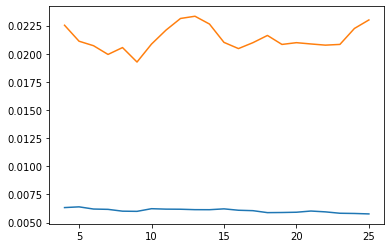

In [615]:
import matplotlib.pyplot as plt
startRange = 3
stopRange = 500
plt.plot(epochsSt[startRange:stopRange], train_loss[startRange:stopRange])
plt.plot(epochsSt[startRange:stopRange], val_loss[startRange:stopRange])
plt.show()

In [616]:
from sklearn.metrics import mean_squared_error
model.to('cpu')
y_pred = model(val_data).detach().numpy()
model.to(device)
mean_squared_error(val_labels, y_pred, squared=False)

0.089924335

In [617]:
print(model.device)

cuda:0


In [618]:
torch.save(model.state_dict(), 'Task4pretrainedModel')

In [149]:
model.load_state_dict(torch.load('Task4pretrainedModel'))

<All keys matched successfully>

Freeze all except last layer

In [150]:
for param in model.parameters():
    param.requires_grad = False
for param in model.lin2.parameters():
    param.requires_grad = True

In [152]:
lrFine= 0.005
epochsFine = 9000
optFine = optim.Adam(model.parameters(), lr=lrFine)
lossFine = nn.MSELoss()

In [153]:
train_featNP100torch = train_featNP100normal
train_labelsNP100torch = torch.from_numpy(train_labelsNP100)[:,0]

In [154]:
trainFine = train_featNP100torch#[:85]
trainLabelsFine = train_labelsNP100torch#[:85]
valFine = train_featNP100torch[85:]
valLabelsFine = train_labelsNP100torch[85:]

In [155]:
train_labelsNP100torch.shape

torch.Size([100])

In [156]:
#epochsFine = 100
#train_loss = []
#for i in range(epochsFine):
#    print(f"epoch {i}")
    
#    opt.zero_grad()

#    running_loss = 0.0
#    X = train_featNP100torch.to(device)
#    labels = train_labelsNP100torch.to(device)
    #print(X.device)


    #opt.zero_grad()

#    inp = model(X)#.detach().cpu()
#    inp = inp.view(inp.shape[0])



#    output = lossFine(inp, labels)
    #output.retain_grad()
#    output.backward()
#    optFine.step()
#    running_loss += output.item()
    


#    print(f"Train Loss: {running_loss}")
#    train_loss.append(running_loss)
    
#print(f"Train Loss: {np.mean(np.asarray(train_loss))}")


In [157]:
def fit2(model, inpX, inp_labels):
    inpX = inpX.to(device)
    inp_labels = inp_labels.to(device)
    model.train()
    model.to(device)
    
    
    opt.zero_grad()


    opt.zero_grad()

    inp = model(inpX)#.detach().cpu()
    inp = inp.view(inp.shape[0])
    

    output = lossFine(inp, inp_labels)
    output.backward()
    optFine.step()

    return output.item(), model

In [158]:
def validate2(model, X, labels):
    inpX = X.to(device)
    inp_labels = labels.to(device)
    model.eval()
    running_loss = 0.0
    
    with torch.no_grad():
        
        #opt.zero_grad()

        inp = model(inpX)        
        inp = inp.view(inp.shape[0])
        
        output = loss(inp, inp_labels)

    return output.item(), model

In [159]:
train_loss = []
val_loss = []

torch.backends.cudnn.benchmark = True #choose best kernel for computation

for epoch in range(epochsFine):
    print(f"Epoch {epoch+1} of {epochsFine}")

    train_epoch_loss, model = fit2(model, trainFine, trainLabelsFine)
    val_epoch_loss, model = validate2(model, valFine, valLabelsFine)
    print(f"Train Loss: {np.mean(np.asarray(train_epoch_loss))}")
    print(f"Val Loss: {np.mean(np.asarray(val_epoch_loss))}")
    train_loss.append(np.mean(np.asarray(train_epoch_loss)))
    val_loss.append(np.mean(np.asarray(val_epoch_loss)))

print(f"Train Loss: {train_loss}")
print(f"Val Loss: {val_loss}")

Epoch 1 of 9000
Train Loss: 26.51234245300293
Val Loss: 3.00681734085083
Epoch 2 of 9000
Train Loss: 26.0856876373291
Val Loss: 2.9836266040802
Epoch 3 of 9000
Train Loss: 25.66266632080078
Val Loss: 2.960211753845215
Epoch 4 of 9000
Train Loss: 25.24333381652832
Val Loss: 2.936572790145874
Epoch 5 of 9000
Train Loss: 24.8277587890625
Val Loss: 2.91291880607605
Epoch 6 of 9000
Train Loss: 24.41598892211914
Val Loss: 2.8891196250915527
Epoch 7 of 9000
Train Loss: 24.008085250854492
Val Loss: 2.865157127380371
Epoch 8 of 9000
Train Loss: 23.604101181030273
Val Loss: 2.8410441875457764
Epoch 9 of 9000
Train Loss: 23.20408821105957
Val Loss: 2.81681752204895
Epoch 10 of 9000
Train Loss: 22.808090209960938
Val Loss: 2.792506456375122
Epoch 11 of 9000
Train Loss: 22.416156768798828
Val Loss: 2.768110752105713
Epoch 12 of 9000
Train Loss: 22.028329849243164
Val Loss: 2.743647813796997
Epoch 13 of 9000
Train Loss: 21.644649505615234
Val Loss: 2.719134569168091
Epoch 14 of 9000
Train Loss: 21.2

Train Loss: 1.972819209098816
Val Loss: 0.6944708824157715
Epoch 122 of 9000
Train Loss: 1.9257198572158813
Val Loss: 0.6833315491676331
Epoch 123 of 9000
Train Loss: 1.879838466644287
Val Loss: 0.6723268032073975
Epoch 124 of 9000
Train Loss: 1.8351486921310425
Val Loss: 0.6614563465118408
Epoch 125 of 9000
Train Loss: 1.7916243076324463
Val Loss: 0.6507192254066467
Epoch 126 of 9000
Train Loss: 1.749239444732666
Val Loss: 0.6401149034500122
Epoch 127 of 9000
Train Loss: 1.7079683542251587
Val Loss: 0.6296427249908447
Epoch 128 of 9000
Train Loss: 1.6677864789962769
Val Loss: 0.6193019151687622
Epoch 129 of 9000
Train Loss: 1.6286691427230835
Val Loss: 0.6090918779373169
Epoch 130 of 9000
Train Loss: 1.590591549873352
Val Loss: 0.5990117788314819
Epoch 131 of 9000
Train Loss: 1.5535305738449097
Val Loss: 0.58906090259552
Epoch 132 of 9000
Train Loss: 1.517462134361267
Val Loss: 0.5802930593490601
Epoch 133 of 9000
Train Loss: 1.482363224029541
Val Loss: 0.5725966095924377
Epoch 134 of

Train Loss: 0.3141426742076874
Val Loss: 0.2685559093952179
Epoch 244 of 9000
Train Loss: 0.31230413913726807
Val Loss: 0.2676548957824707
Epoch 245 of 9000
Train Loss: 0.3104999363422394
Val Loss: 0.26676204800605774
Epoch 246 of 9000
Train Loss: 0.308728963136673
Val Loss: 0.2658771872520447
Epoch 247 of 9000
Train Loss: 0.3069903552532196
Val Loss: 0.26500025391578674
Epoch 248 of 9000
Train Loss: 0.3052830994129181
Val Loss: 0.26413121819496155
Epoch 249 of 9000
Train Loss: 0.30360642075538635
Val Loss: 0.26326999068260193
Epoch 250 of 9000
Train Loss: 0.30195942521095276
Val Loss: 0.2624163031578064
Epoch 251 of 9000
Train Loss: 0.3003412187099457
Val Loss: 0.2615703046321869
Epoch 252 of 9000
Train Loss: 0.2987511456012726
Val Loss: 0.2607317566871643
Epoch 253 of 9000
Train Loss: 0.297188401222229
Val Loss: 0.25990059971809387
Epoch 254 of 9000
Train Loss: 0.2956521511077881
Val Loss: 0.2590767443180084
Epoch 255 of 9000
Train Loss: 0.2941417694091797
Val Loss: 0.258260190486907

Train Loss: 0.20791736245155334
Val Loss: 0.20583610236644745
Epoch 367 of 9000
Train Loss: 0.20752963423728943
Val Loss: 0.20558983087539673
Epoch 368 of 9000
Train Loss: 0.20714569091796875
Val Loss: 0.20534563064575195
Epoch 369 of 9000
Train Loss: 0.20676535367965698
Val Loss: 0.2051033079624176
Epoch 370 of 9000
Train Loss: 0.2063887119293213
Val Loss: 0.20486289262771606
Epoch 371 of 9000
Train Loss: 0.20601564645767212
Val Loss: 0.20462433993816376
Epoch 372 of 9000
Train Loss: 0.20564612746238708
Val Loss: 0.20438769459724426
Epoch 373 of 9000
Train Loss: 0.205280140042305
Val Loss: 0.2041528820991516
Epoch 374 of 9000
Train Loss: 0.20491759479045868
Val Loss: 0.20391987264156342
Epoch 375 of 9000
Train Loss: 0.20455844700336456
Val Loss: 0.20368871092796326
Epoch 376 of 9000
Train Loss: 0.20420266687870026
Val Loss: 0.20345930755138397
Epoch 377 of 9000
Train Loss: 0.20385022461414337
Val Loss: 0.20323172211647034
Epoch 378 of 9000
Train Loss: 0.20350106060504913
Val Loss: 0.2

Train Loss: 0.17708030343055725
Val Loss: 0.18549612164497375
Epoch 495 of 9000
Train Loss: 0.1769268810749054
Val Loss: 0.1854008436203003
Epoch 496 of 9000
Train Loss: 0.17677417397499084
Val Loss: 0.18530626595020294
Epoch 497 of 9000
Train Loss: 0.17662222683429718
Val Loss: 0.18521243333816528
Epoch 498 of 9000
Train Loss: 0.1764710545539856
Val Loss: 0.18511922657489777
Epoch 499 of 9000
Train Loss: 0.17632056772708893
Val Loss: 0.18502676486968994
Epoch 500 of 9000
Train Loss: 0.17617084085941315
Val Loss: 0.18493500351905823
Epoch 501 of 9000
Train Loss: 0.17602181434631348
Val Loss: 0.18484386801719666
Epoch 502 of 9000
Train Loss: 0.17587348818778992
Val Loss: 0.18475346267223358
Epoch 503 of 9000
Train Loss: 0.17572587728500366
Val Loss: 0.18466371297836304
Epoch 504 of 9000
Train Loss: 0.17557895183563232
Val Loss: 0.18457461893558502
Epoch 505 of 9000
Train Loss: 0.17543277144432068
Val Loss: 0.1845017820596695
Epoch 506 of 9000
Train Loss: 0.1752871870994568
Val Loss: 0.1

Epoch 601 of 9000
Train Loss: 0.1638171672821045
Val Loss: 0.18065635859966278
Epoch 602 of 9000
Train Loss: 0.16371546685695648
Val Loss: 0.18062815070152283
Epoch 603 of 9000
Train Loss: 0.16361409425735474
Val Loss: 0.1806000918149948
Epoch 604 of 9000
Train Loss: 0.16351304948329926
Val Loss: 0.18057212233543396
Epoch 605 of 9000
Train Loss: 0.16341231763362885
Val Loss: 0.18054430186748505
Epoch 606 of 9000
Train Loss: 0.16331182420253754
Val Loss: 0.18051663041114807
Epoch 607 of 9000
Train Loss: 0.1632116734981537
Val Loss: 0.18048903346061707
Epoch 608 of 9000
Train Loss: 0.1631118357181549
Val Loss: 0.180461585521698
Epoch 609 of 9000
Train Loss: 0.16301226615905762
Val Loss: 0.18043427169322968
Epoch 610 of 9000
Train Loss: 0.162912979722023
Val Loss: 0.1804070919752121
Epoch 611 of 9000
Train Loss: 0.16281402111053467
Val Loss: 0.18038006126880646
Epoch 612 of 9000
Train Loss: 0.1627153754234314
Val Loss: 0.1803530901670456
Epoch 613 of 9000
Train Loss: 0.16261696815490723
V

Train Loss: 0.15293264389038086
Val Loss: 0.17774373292922974
Epoch 728 of 9000
Train Loss: 0.15285860002040863
Val Loss: 0.1777232438325882
Epoch 729 of 9000
Train Loss: 0.15278464555740356
Val Loss: 0.17770281434059143
Epoch 730 of 9000
Train Loss: 0.1527108997106552
Val Loss: 0.17768241465091705
Epoch 731 of 9000
Train Loss: 0.1526372879743576
Val Loss: 0.1776619851589203
Epoch 732 of 9000
Train Loss: 0.15256382524967194
Val Loss: 0.17764151096343994
Epoch 733 of 9000
Train Loss: 0.1524905115365982
Val Loss: 0.17762118577957153
Epoch 734 of 9000
Train Loss: 0.1524173617362976
Val Loss: 0.17760080099105835
Epoch 735 of 9000
Train Loss: 0.15234434604644775
Val Loss: 0.17758047580718994
Epoch 736 of 9000
Train Loss: 0.15227147936820984
Val Loss: 0.17756009101867676
Epoch 737 of 9000
Train Loss: 0.15219876170158386
Val Loss: 0.17753973603248596
Epoch 738 of 9000
Train Loss: 0.15212619304656982
Val Loss: 0.17751941084861755
Epoch 739 of 9000
Train Loss: 0.15205378830432892
Val Loss: 0.17

Train Loss: 0.14467215538024902
Val Loss: 0.1751859486103058
Epoch 853 of 9000
Train Loss: 0.14461290836334229
Val Loss: 0.1751648634672165
Epoch 854 of 9000
Train Loss: 0.14455372095108032
Val Loss: 0.17514373362064362
Epoch 855 of 9000
Train Loss: 0.1444946527481079
Val Loss: 0.17512264847755432
Epoch 856 of 9000
Train Loss: 0.14443564414978027
Val Loss: 0.17510151863098145
Epoch 857 of 9000
Train Loss: 0.14437678456306458
Val Loss: 0.175080344080925
Epoch 858 of 9000
Train Loss: 0.14431792497634888
Val Loss: 0.17505919933319092
Epoch 859 of 9000
Train Loss: 0.14425921440124512
Val Loss: 0.17503802478313446
Epoch 860 of 9000
Train Loss: 0.14420059323310852
Val Loss: 0.175016850233078
Epoch 861 of 9000
Train Loss: 0.1441420465707779
Val Loss: 0.17499561607837677
Epoch 862 of 9000
Train Loss: 0.14408358931541443
Val Loss: 0.17497438192367554
Epoch 863 of 9000
Train Loss: 0.14402519166469574
Val Loss: 0.17495442926883698
Epoch 864 of 9000
Train Loss: 0.143966943025589
Val Loss: 0.174941

Train Loss: 0.13823872804641724
Val Loss: 0.17405882477760315
Epoch 971 of 9000
Train Loss: 0.13818849623203278
Val Loss: 0.17405781149864197
Epoch 972 of 9000
Train Loss: 0.13813836872577667
Val Loss: 0.17405664920806885
Epoch 973 of 9000
Train Loss: 0.13808825612068176
Val Loss: 0.17405559122562408
Epoch 974 of 9000
Train Loss: 0.1380382627248764
Val Loss: 0.17405444383621216
Epoch 975 of 9000
Train Loss: 0.13798829913139343
Val Loss: 0.17405326664447784
Epoch 976 of 9000
Train Loss: 0.13793839514255524
Val Loss: 0.17405201494693756
Epoch 977 of 9000
Train Loss: 0.1378885805606842
Val Loss: 0.17405082285404205
Epoch 978 of 9000
Train Loss: 0.13783881068229675
Val Loss: 0.174049511551857
Epoch 979 of 9000
Train Loss: 0.13778910040855408
Val Loss: 0.17404821515083313
Epoch 980 of 9000
Train Loss: 0.13773947954177856
Val Loss: 0.1740468591451645
Epoch 981 of 9000
Train Loss: 0.13768991827964783
Val Loss: 0.17404553294181824
Epoch 982 of 9000
Train Loss: 0.13764038681983948
Val Loss: 0.1

Train Loss: 0.13238123059272766
Val Loss: 0.1736593395471573
Epoch 1097 of 9000
Train Loss: 0.13233822584152222
Val Loss: 0.17365384101867676
Epoch 1098 of 9000
Train Loss: 0.13229529559612274
Val Loss: 0.17364829778671265
Epoch 1099 of 9000
Train Loss: 0.13225239515304565
Val Loss: 0.17364278435707092
Epoch 1100 of 9000
Train Loss: 0.13220952451229095
Val Loss: 0.17363710701465607
Epoch 1101 of 9000
Train Loss: 0.13216672837734222
Val Loss: 0.1736314743757248
Epoch 1102 of 9000
Train Loss: 0.13212399184703827
Val Loss: 0.17362579703330994
Epoch 1103 of 9000
Train Loss: 0.1320812851190567
Val Loss: 0.1736200451850891
Epoch 1104 of 9000
Train Loss: 0.1320386379957199
Val Loss: 0.17361430823802948
Epoch 1105 of 9000
Train Loss: 0.1319960206747055
Val Loss: 0.17360849678516388
Epoch 1106 of 9000
Train Loss: 0.13195347785949707
Val Loss: 0.1736026555299759
Epoch 1107 of 9000
Train Loss: 0.13191097974777222
Val Loss: 0.1735967993736267
Epoch 1108 of 9000
Train Loss: 0.13186851143836975
Val 

Train Loss: 0.12737354636192322
Val Loss: 0.17303797602653503
Epoch 1222 of 9000
Train Loss: 0.1273362934589386
Val Loss: 0.17303331196308136
Epoch 1223 of 9000
Train Loss: 0.12729907035827637
Val Loss: 0.17302854359149933
Epoch 1224 of 9000
Train Loss: 0.1272619068622589
Val Loss: 0.1730237454175949
Epoch 1225 of 9000
Train Loss: 0.12722477316856384
Val Loss: 0.1730189472436905
Epoch 1226 of 9000
Train Loss: 0.12718771398067474
Val Loss: 0.17301404476165771
Epoch 1227 of 9000
Train Loss: 0.12715063989162445
Val Loss: 0.17300911247730255
Epoch 1228 of 9000
Train Loss: 0.12711364030838013
Val Loss: 0.1730041801929474
Epoch 1229 of 9000
Train Loss: 0.12707668542861938
Val Loss: 0.17299923300743103
Epoch 1230 of 9000
Train Loss: 0.12703973054885864
Val Loss: 0.1729942113161087
Epoch 1231 of 9000
Train Loss: 0.12700286507606506
Val Loss: 0.1729891300201416
Epoch 1232 of 9000
Train Loss: 0.12696601450443268
Val Loss: 0.1729840189218521
Epoch 1233 of 9000
Train Loss: 0.12692922353744507
Val 

Train Loss: 0.1230219304561615
Val Loss: 0.17214322090148926
Epoch 1347 of 9000
Train Loss: 0.1229894608259201
Val Loss: 0.1721336394548416
Epoch 1348 of 9000
Train Loss: 0.12295705825090408
Val Loss: 0.17212407290935516
Epoch 1349 of 9000
Train Loss: 0.12292461097240448
Val Loss: 0.17211449146270752
Epoch 1350 of 9000
Train Loss: 0.12289225310087204
Val Loss: 0.1721048504114151
Epoch 1351 of 9000
Train Loss: 0.12285995483398438
Val Loss: 0.1720951348543167
Epoch 1352 of 9000
Train Loss: 0.12282764166593552
Val Loss: 0.17208543419837952
Epoch 1353 of 9000
Train Loss: 0.12279536575078964
Val Loss: 0.17207568883895874
Epoch 1354 of 9000
Train Loss: 0.12276313453912735
Val Loss: 0.17206589877605438
Epoch 1355 of 9000
Train Loss: 0.12273097038269043
Val Loss: 0.17205607891082764
Epoch 1356 of 9000
Train Loss: 0.1226988211274147
Val Loss: 0.1720462441444397
Epoch 1357 of 9000
Train Loss: 0.12266666442155838
Val Loss: 0.17203640937805176
Epoch 1358 of 9000
Train Loss: 0.12263461202383041
Val

Train Loss: 0.11985383927822113
Val Loss: 0.17098499834537506
Epoch 1450 of 9000
Train Loss: 0.11982472985982895
Val Loss: 0.17097218334674835
Epoch 1451 of 9000
Train Loss: 0.11979566514492035
Val Loss: 0.1709592640399933
Epoch 1452 of 9000
Train Loss: 0.11976664513349533
Val Loss: 0.17094630002975464
Epoch 1453 of 9000
Train Loss: 0.1197376400232315
Val Loss: 0.17093336582183838
Epoch 1454 of 9000
Train Loss: 0.11970867961645126
Val Loss: 0.17092037200927734
Epoch 1455 of 9000
Train Loss: 0.11967972666025162
Val Loss: 0.1709073930978775
Epoch 1456 of 9000
Train Loss: 0.11965081840753555
Val Loss: 0.17089435458183289
Epoch 1457 of 9000
Train Loss: 0.11962192505598068
Val Loss: 0.17088119685649872
Epoch 1458 of 9000
Train Loss: 0.11959308385848999
Val Loss: 0.1708681881427765
Epoch 1459 of 9000
Train Loss: 0.11956427246332169
Val Loss: 0.1708550602197647
Epoch 1460 of 9000
Train Loss: 0.11953546851873398
Val Loss: 0.17084188759326935
Epoch 1461 of 9000
Train Loss: 0.11950671672821045
V

Train Loss: 0.11644121259450912
Val Loss: 0.169174462556839
Epoch 1575 of 9000
Train Loss: 0.11641564965248108
Val Loss: 0.16915848851203918
Epoch 1576 of 9000
Train Loss: 0.11639007180929184
Val Loss: 0.16914251446723938
Epoch 1577 of 9000
Train Loss: 0.11636455357074738
Val Loss: 0.16912655532360077
Epoch 1578 of 9000
Train Loss: 0.1163390502333641
Val Loss: 0.16911056637763977
Epoch 1579 of 9000
Train Loss: 0.11631357669830322
Val Loss: 0.16909447312355042
Epoch 1580 of 9000
Train Loss: 0.11628812551498413
Val Loss: 0.16907846927642822
Epoch 1581 of 9000
Train Loss: 0.11626269668340683
Val Loss: 0.16906240582466125
Epoch 1582 of 9000
Train Loss: 0.11623729765415192
Val Loss: 0.1690463125705719
Epoch 1583 of 9000
Train Loss: 0.11621192842721939
Val Loss: 0.16903023421764374
Epoch 1584 of 9000
Train Loss: 0.11618659645318985
Val Loss: 0.1690140813589096
Epoch 1585 of 9000
Train Loss: 0.11616125702857971
Val Loss: 0.16899791359901428
Epoch 1586 of 9000
Train Loss: 0.11613594740629196
V

Train Loss: 0.11391256004571915
Val Loss: 0.16741859912872314
Epoch 1679 of 9000
Train Loss: 0.11388947069644928
Val Loss: 0.16740094125270844
Epoch 1680 of 9000
Train Loss: 0.1138664186000824
Val Loss: 0.16738319396972656
Epoch 1681 of 9000
Train Loss: 0.11384338140487671
Val Loss: 0.1673654317855835
Epoch 1682 of 9000
Train Loss: 0.11382035911083221
Val Loss: 0.16734760999679565
Epoch 1683 of 9000
Train Loss: 0.11379736661911011
Val Loss: 0.16732987761497498
Epoch 1684 of 9000
Train Loss: 0.1137743815779686
Val Loss: 0.16731208562850952
Epoch 1685 of 9000
Train Loss: 0.11375142633914948
Val Loss: 0.16729429364204407
Epoch 1686 of 9000
Train Loss: 0.11372850835323334
Val Loss: 0.16727648675441742
Epoch 1687 of 9000
Train Loss: 0.1137055978178978
Val Loss: 0.167258620262146
Epoch 1688 of 9000
Train Loss: 0.11368271708488464
Val Loss: 0.16724078357219696
Epoch 1689 of 9000
Train Loss: 0.11365985870361328
Val Loss: 0.16722287237644196
Epoch 1690 of 9000
Train Loss: 0.11363700777292252
Va

Train Loss: 0.11166715621948242
Val Loss: 0.16554802656173706
Epoch 1781 of 9000
Train Loss: 0.11164618283510208
Val Loss: 0.16552911698818207
Epoch 1782 of 9000
Train Loss: 0.11162520945072174
Val Loss: 0.16551028192043304
Epoch 1783 of 9000
Train Loss: 0.11160426586866379
Val Loss: 0.16549137234687805
Epoch 1784 of 9000
Train Loss: 0.11158337444067001
Val Loss: 0.16547244787216187
Epoch 1785 of 9000
Train Loss: 0.11156247556209564
Val Loss: 0.16545353829860687
Epoch 1786 of 9000
Train Loss: 0.11154158413410187
Val Loss: 0.16543464362621307
Epoch 1787 of 9000
Train Loss: 0.11152072995901108
Val Loss: 0.1654157042503357
Epoch 1788 of 9000
Train Loss: 0.11149987578392029
Val Loss: 0.1653967648744583
Epoch 1789 of 9000
Train Loss: 0.11147905886173248
Val Loss: 0.16537779569625854
Epoch 1790 of 9000
Train Loss: 0.11145826429128647
Val Loss: 0.16535887122154236
Epoch 1791 of 9000
Train Loss: 0.11143746227025986
Val Loss: 0.16533996164798737
Epoch 1792 of 9000
Train Loss: 0.1114166975021362

Train Loss: 0.10916584730148315
Val Loss: 0.16311503946781158
Epoch 1907 of 9000
Train Loss: 0.1091470867395401
Val Loss: 0.1630954146385193
Epoch 1908 of 9000
Train Loss: 0.10912830382585526
Val Loss: 0.1630757451057434
Epoch 1909 of 9000
Train Loss: 0.1091095358133316
Val Loss: 0.1630561351776123
Epoch 1910 of 9000
Train Loss: 0.10909081995487213
Val Loss: 0.16303639113903046
Epoch 1911 of 9000
Train Loss: 0.10907208174467087
Val Loss: 0.16301676630973816
Epoch 1912 of 9000
Train Loss: 0.10905338078737259
Val Loss: 0.16299712657928467
Epoch 1913 of 9000
Train Loss: 0.10903467983007431
Val Loss: 0.16297747194766998
Epoch 1914 of 9000
Train Loss: 0.10901602357625961
Val Loss: 0.16295775771141052
Epoch 1915 of 9000
Train Loss: 0.10899734497070312
Val Loss: 0.16293813288211823
Epoch 1916 of 9000
Train Loss: 0.10897871106863022
Val Loss: 0.16291838884353638
Epoch 1917 of 9000
Train Loss: 0.10896006971597672
Val Loss: 0.16289877891540527
Epoch 1918 of 9000
Train Loss: 0.10894148796796799
V

Train Loss: 0.10691474378108978
Val Loss: 0.16062039136886597
Epoch 2033 of 9000
Train Loss: 0.1068977490067482
Val Loss: 0.16060049831867218
Epoch 2034 of 9000
Train Loss: 0.106880784034729
Val Loss: 0.1605805903673172
Epoch 2035 of 9000
Train Loss: 0.10686378180980682
Val Loss: 0.1605606973171234
Epoch 2036 of 9000
Train Loss: 0.10684684664011002
Val Loss: 0.16054078936576843
Epoch 2037 of 9000
Train Loss: 0.10682986676692963
Val Loss: 0.16052089631557465
Epoch 2038 of 9000
Train Loss: 0.1068129688501358
Val Loss: 0.16050104796886444
Epoch 2039 of 9000
Train Loss: 0.1067960113286972
Val Loss: 0.16048114001750946
Epoch 2040 of 9000
Train Loss: 0.10677912831306458
Val Loss: 0.16046127676963806
Epoch 2041 of 9000
Train Loss: 0.10676223784685135
Val Loss: 0.16044136881828308
Epoch 2042 of 9000
Train Loss: 0.10674535483121872
Val Loss: 0.1604214757680893
Epoch 2043 of 9000
Train Loss: 0.1067284494638443
Val Loss: 0.16040167212486267
Epoch 2044 of 9000
Train Loss: 0.10671160370111465
Val L

Val Loss: 0.158119335770607
Epoch 2159 of 9000
Train Loss: 0.104850172996521
Val Loss: 0.15809953212738037
Epoch 2160 of 9000
Train Loss: 0.10483460128307343
Val Loss: 0.15807977318763733
Epoch 2161 of 9000
Train Loss: 0.10481904447078705
Val Loss: 0.1580599695444107
Epoch 2162 of 9000
Train Loss: 0.10480352491140366
Val Loss: 0.15804021060466766
Epoch 2163 of 9000
Train Loss: 0.10478799790143967
Val Loss: 0.15802040696144104
Epoch 2164 of 9000
Train Loss: 0.10477244853973389
Val Loss: 0.15800069272518158
Epoch 2165 of 9000
Train Loss: 0.10475694388151169
Val Loss: 0.15798096358776093
Epoch 2166 of 9000
Train Loss: 0.10474145412445068
Val Loss: 0.15796121954917908
Epoch 2167 of 9000
Train Loss: 0.10472594946622849
Val Loss: 0.15794143080711365
Epoch 2168 of 9000
Train Loss: 0.10471048206090927
Val Loss: 0.15792164206504822
Epoch 2169 of 9000
Train Loss: 0.10469501465559006
Val Loss: 0.15790194272994995
Epoch 2170 of 9000
Train Loss: 0.10467956215143204
Val Loss: 0.1578822284936905
Epoc

Train Loss: 0.10331153869628906
Val Loss: 0.15609508752822876
Epoch 2262 of 9000
Train Loss: 0.1032969057559967
Val Loss: 0.1560756117105484
Epoch 2263 of 9000
Train Loss: 0.10328228026628494
Val Loss: 0.15605606138706207
Epoch 2264 of 9000
Train Loss: 0.10326766967773438
Val Loss: 0.15603654086589813
Epoch 2265 of 9000
Train Loss: 0.10325305908918381
Val Loss: 0.15601703524589539
Epoch 2266 of 9000
Train Loss: 0.10323845595121384
Val Loss: 0.15599749982357025
Epoch 2267 of 9000
Train Loss: 0.10322386771440506
Val Loss: 0.1559780240058899
Epoch 2268 of 9000
Train Loss: 0.10320928692817688
Val Loss: 0.15595853328704834
Epoch 2269 of 9000
Train Loss: 0.1031947210431099
Val Loss: 0.1559390127658844
Epoch 2270 of 9000
Train Loss: 0.10318014025688171
Val Loss: 0.15591956675052643
Epoch 2271 of 9000
Train Loss: 0.10316559672355652
Val Loss: 0.15590007603168488
Epoch 2272 of 9000
Train Loss: 0.10315103083848953
Val Loss: 0.1558806449174881
Epoch 2273 of 9000
Train Loss: 0.10313650220632553
Va

Train Loss: 0.10155466198921204
Val Loss: 0.1536995768547058
Epoch 2386 of 9000
Train Loss: 0.10154091566801071
Val Loss: 0.1536804884672165
Epoch 2387 of 9000
Train Loss: 0.10152719169855118
Val Loss: 0.15366137027740479
Epoch 2388 of 9000
Train Loss: 0.10151345282793045
Val Loss: 0.15364228188991547
Epoch 2389 of 9000
Train Loss: 0.10149974375963211
Val Loss: 0.15362320840358734
Epoch 2390 of 9000
Train Loss: 0.10148604959249496
Val Loss: 0.15360412001609802
Epoch 2391 of 9000
Train Loss: 0.10147232562303543
Val Loss: 0.1535850316286087
Epoch 2392 of 9000
Train Loss: 0.10145861655473709
Val Loss: 0.15356594324111938
Epoch 2393 of 9000
Train Loss: 0.10144493728876114
Val Loss: 0.15354685485363007
Epoch 2394 of 9000
Train Loss: 0.10143125057220459
Val Loss: 0.15352781116962433
Epoch 2395 of 9000
Train Loss: 0.10141755640506744
Val Loss: 0.153508722782135
Epoch 2396 of 9000
Train Loss: 0.1014038696885109
Val Loss: 0.1534896343946457
Epoch 2397 of 9000
Train Loss: 0.10139020532369614
Val

Train Loss: 0.10017023980617523
Val Loss: 0.151750385761261
Epoch 2489 of 9000
Train Loss: 0.10015705227851868
Val Loss: 0.15173165500164032
Epoch 2490 of 9000
Train Loss: 0.1001439169049263
Val Loss: 0.15171293914318085
Epoch 2491 of 9000
Train Loss: 0.10013075917959213
Val Loss: 0.1516941785812378
Epoch 2492 of 9000
Train Loss: 0.10011760145425797
Val Loss: 0.15167544782161713
Epoch 2493 of 9000
Train Loss: 0.10010447353124619
Val Loss: 0.15165676176548004
Epoch 2494 of 9000
Train Loss: 0.10009133070707321
Val Loss: 0.15163807570934296
Epoch 2495 of 9000
Train Loss: 0.10007819533348083
Val Loss: 0.15161938965320587
Epoch 2496 of 9000
Train Loss: 0.10006505995988846
Val Loss: 0.15160062909126282
Epoch 2497 of 9000
Train Loss: 0.10005193203687668
Val Loss: 0.15158191323280334
Epoch 2498 of 9000
Train Loss: 0.10003884881734848
Val Loss: 0.15156322717666626
Epoch 2499 of 9000
Train Loss: 0.1000257283449173
Val Loss: 0.1515445113182068
Epoch 2500 of 9000
Train Loss: 0.10001262277364731
Va

Train Loss: 0.0986480787396431
Val Loss: 0.1495642066001892
Epoch 2607 of 9000
Train Loss: 0.09863538295030594
Val Loss: 0.14954586327075958
Epoch 2608 of 9000
Train Loss: 0.09862276166677475
Val Loss: 0.14952756464481354
Epoch 2609 of 9000
Train Loss: 0.09861008077859879
Val Loss: 0.1495092809200287
Epoch 2610 of 9000
Train Loss: 0.0985974445939064
Val Loss: 0.14949096739292145
Epoch 2611 of 9000
Train Loss: 0.09858480095863342
Val Loss: 0.1494726538658142
Epoch 2612 of 9000
Train Loss: 0.09857217222452164
Val Loss: 0.14945434033870697
Epoch 2613 of 9000
Train Loss: 0.09855951368808746
Val Loss: 0.14943605661392212
Epoch 2614 of 9000
Train Loss: 0.09854689240455627
Val Loss: 0.14941775798797607
Epoch 2615 of 9000
Train Loss: 0.09853426367044449
Val Loss: 0.14939947426319122
Epoch 2616 of 9000
Train Loss: 0.0985216274857521
Val Loss: 0.14938117563724518
Epoch 2617 of 9000
Train Loss: 0.09850902110338211
Val Loss: 0.14936292171478271
Epoch 2618 of 9000
Train Loss: 0.09849639981985092
Va

Train Loss: 0.09718913584947586
Val Loss: 0.14744345843791962
Epoch 2724 of 9000
Train Loss: 0.09717685729265213
Val Loss: 0.14742547273635864
Epoch 2725 of 9000
Train Loss: 0.0971645638346672
Val Loss: 0.14740754663944244
Epoch 2726 of 9000
Train Loss: 0.09715224802494049
Val Loss: 0.14738960564136505
Epoch 2727 of 9000
Train Loss: 0.09713998436927795
Val Loss: 0.14737167954444885
Epoch 2728 of 9000
Train Loss: 0.09712768346071243
Val Loss: 0.14735375344753265
Epoch 2729 of 9000
Train Loss: 0.0971154198050499
Val Loss: 0.14733579754829407
Epoch 2730 of 9000
Train Loss: 0.09710311889648438
Val Loss: 0.14731793105602264
Epoch 2731 of 9000
Train Loss: 0.09709083288908005
Val Loss: 0.14729996025562286
Epoch 2732 of 9000
Train Loss: 0.09707856178283691
Val Loss: 0.14728209376335144
Epoch 2733 of 9000
Train Loss: 0.09706630557775497
Val Loss: 0.14726416766643524
Epoch 2734 of 9000
Train Loss: 0.09705401211977005
Val Loss: 0.14724625647068024
Epoch 2735 of 9000
Train Loss: 0.0970417559146881

Train Loss: 0.0956815704703331
Val Loss: 0.1452406644821167
Epoch 2848 of 9000
Train Loss: 0.09566951543092728
Val Loss: 0.14522303640842438
Epoch 2849 of 9000
Train Loss: 0.09565748274326324
Val Loss: 0.14520546793937683
Epoch 2850 of 9000
Train Loss: 0.0956454649567604
Val Loss: 0.1451878398656845
Epoch 2851 of 9000
Train Loss: 0.09563338756561279
Val Loss: 0.14517030119895935
Epoch 2852 of 9000
Train Loss: 0.09562138468027115
Val Loss: 0.14515270292758942
Epoch 2853 of 9000
Train Loss: 0.09560937434434891
Val Loss: 0.1451350748538971
Epoch 2854 of 9000
Train Loss: 0.09559734910726547
Val Loss: 0.14511755108833313
Epoch 2855 of 9000
Train Loss: 0.09558533132076263
Val Loss: 0.145099937915802
Epoch 2856 of 9000
Train Loss: 0.0955732986330986
Val Loss: 0.14508232474327087
Epoch 2857 of 9000
Train Loss: 0.09556127339601517
Val Loss: 0.1450648009777069
Epoch 2858 of 9000
Train Loss: 0.09554924070835114
Val Loss: 0.14504721760749817
Epoch 2859 of 9000
Train Loss: 0.09553723782300949
Val L

Train Loss: 0.09423572570085526
Val Loss: 0.14312803745269775
Epoch 2969 of 9000
Train Loss: 0.09422383457422256
Val Loss: 0.1431107223033905
Epoch 2970 of 9000
Train Loss: 0.09421195834875107
Val Loss: 0.14309340715408325
Epoch 2971 of 9000
Train Loss: 0.09420009702444077
Val Loss: 0.14307604730129242
Epoch 2972 of 9000
Train Loss: 0.09418819099664688
Val Loss: 0.14305870234966278
Epoch 2973 of 9000
Train Loss: 0.09417634457349777
Val Loss: 0.14304140210151672
Epoch 2974 of 9000
Train Loss: 0.09416446834802628
Val Loss: 0.14302408695220947
Epoch 2975 of 9000
Train Loss: 0.09415260702371597
Val Loss: 0.14300678670406342
Epoch 2976 of 9000
Train Loss: 0.09414073079824448
Val Loss: 0.142989382147789
Epoch 2977 of 9000
Train Loss: 0.09412884712219238
Val Loss: 0.14297212660312653
Epoch 2978 of 9000
Train Loss: 0.09411697834730148
Val Loss: 0.14295487105846405
Epoch 2979 of 9000
Train Loss: 0.09410512447357178
Val Loss: 0.1429375410079956
Epoch 2980 of 9000
Train Loss: 0.09409326314926147


Train Loss: 0.09279273450374603
Val Loss: 0.14102663099765778
Epoch 3091 of 9000
Train Loss: 0.0927809476852417
Val Loss: 0.14100949466228485
Epoch 3092 of 9000
Train Loss: 0.09276914596557617
Val Loss: 0.14099237322807312
Epoch 3093 of 9000
Train Loss: 0.09275737404823303
Val Loss: 0.14097526669502258
Epoch 3094 of 9000
Train Loss: 0.0927455872297287
Val Loss: 0.14095811545848846
Epoch 3095 of 9000
Train Loss: 0.09273379296064377
Val Loss: 0.14094099402427673
Epoch 3096 of 9000
Train Loss: 0.09272199124097824
Val Loss: 0.1409238576889038
Epoch 3097 of 9000
Train Loss: 0.0927102267742157
Val Loss: 0.14090672135353088
Epoch 3098 of 9000
Train Loss: 0.09269843250513077
Val Loss: 0.14088962972164154
Epoch 3099 of 9000
Train Loss: 0.09268665313720703
Val Loss: 0.140872523188591
Epoch 3100 of 9000
Train Loss: 0.09267484396696091
Val Loss: 0.14085538685321808
Epoch 3101 of 9000
Train Loss: 0.09266307950019836
Val Loss: 0.14083831012248993
Epoch 3102 of 9000
Train Loss: 0.09265127778053284
Va

Train Loss: 0.09142715483903885
Val Loss: 0.13904789090156555
Epoch 3207 of 9000
Train Loss: 0.0914153903722763
Val Loss: 0.13903088867664337
Epoch 3208 of 9000
Train Loss: 0.09140361845493317
Val Loss: 0.13901387155056
Epoch 3209 of 9000
Train Loss: 0.09139185398817062
Val Loss: 0.13899686932563782
Epoch 3210 of 9000
Train Loss: 0.09138008207082748
Val Loss: 0.13897986710071564
Epoch 3211 of 9000
Train Loss: 0.09136833250522614
Val Loss: 0.13896289467811584
Epoch 3212 of 9000
Train Loss: 0.0913565531373024
Val Loss: 0.13894587755203247
Epoch 3213 of 9000
Train Loss: 0.09134480357170105
Val Loss: 0.13892893493175507
Epoch 3214 of 9000
Train Loss: 0.0913330465555191
Val Loss: 0.13891194760799408
Epoch 3215 of 9000
Train Loss: 0.09132127463817596
Val Loss: 0.1388949155807495
Epoch 3216 of 9000
Train Loss: 0.09130949527025223
Val Loss: 0.13887794315814972
Epoch 3217 of 9000
Train Loss: 0.09129776060581207
Val Loss: 0.13886097073554993
Epoch 3218 of 9000
Train Loss: 0.09128598868846893
Val

Train Loss: 0.08994466811418533
Val Loss: 0.13691242039203644
Epoch 3333 of 9000
Train Loss: 0.089932881295681
Val Loss: 0.13689546287059784
Epoch 3334 of 9000
Train Loss: 0.08992109447717667
Val Loss: 0.1368785947561264
Epoch 3335 of 9000
Train Loss: 0.08990932255983353
Val Loss: 0.1368616819381714
Epoch 3336 of 9000
Train Loss: 0.0898975357413292
Val Loss: 0.13684478402137756
Epoch 3337 of 9000
Train Loss: 0.08988577872514725
Val Loss: 0.13682788610458374
Epoch 3338 of 9000
Train Loss: 0.08987399935722351
Val Loss: 0.13681097328662872
Epoch 3339 of 9000
Train Loss: 0.08986222743988037
Val Loss: 0.1367940604686737
Epoch 3340 of 9000
Train Loss: 0.08985045552253723
Val Loss: 0.13677719235420227
Epoch 3341 of 9000
Train Loss: 0.0898386538028717
Val Loss: 0.13676029443740845
Epoch 3342 of 9000
Train Loss: 0.08982688933610916
Val Loss: 0.13674335181713104
Epoch 3343 of 9000
Train Loss: 0.08981508016586304
Val Loss: 0.13672642409801483
Epoch 3344 of 9000
Train Loss: 0.08980332314968109
Val

Train Loss: 0.08870639652013779
Val Loss: 0.1351391226053238
Epoch 3438 of 9000
Train Loss: 0.08869458734989166
Val Loss: 0.13512223958969116
Epoch 3439 of 9000
Train Loss: 0.08868275582790375
Val Loss: 0.13510540127754211
Epoch 3440 of 9000
Train Loss: 0.08867095410823822
Val Loss: 0.1350885033607483
Epoch 3441 of 9000
Train Loss: 0.0886591225862503
Val Loss: 0.13507165014743805
Epoch 3442 of 9000
Train Loss: 0.08864733576774597
Val Loss: 0.13505473732948303
Epoch 3443 of 9000
Train Loss: 0.08863548934459686
Val Loss: 0.1350378692150116
Epoch 3444 of 9000
Train Loss: 0.08862369507551193
Val Loss: 0.13502100110054016
Epoch 3445 of 9000
Train Loss: 0.08861187100410461
Val Loss: 0.13500411808490753
Epoch 3446 of 9000
Train Loss: 0.0886000394821167
Val Loss: 0.1349872201681137
Epoch 3447 of 9000
Train Loss: 0.08858823776245117
Val Loss: 0.13497038185596466
Epoch 3448 of 9000
Train Loss: 0.08857642114162445
Val Loss: 0.13495352864265442
Epoch 3449 of 9000
Train Loss: 0.08856459707021713
Va

Val Loss: 0.13341861963272095
Epoch 3540 of 9000
Train Loss: 0.08748701959848404
Val Loss: 0.1334017515182495
Epoch 3541 of 9000
Train Loss: 0.08747512847185135
Val Loss: 0.13338488340377808
Epoch 3542 of 9000
Train Loss: 0.08746328204870224
Val Loss: 0.13336801528930664
Epoch 3543 of 9000
Train Loss: 0.08745142072439194
Val Loss: 0.1333511769771576
Epoch 3544 of 9000
Train Loss: 0.08743953704833984
Val Loss: 0.13333429396152496
Epoch 3545 of 9000
Train Loss: 0.08742766827344894
Val Loss: 0.13331742584705353
Epoch 3546 of 9000
Train Loss: 0.08741580694913864
Val Loss: 0.1333005577325821
Epoch 3547 of 9000
Train Loss: 0.08740391582250595
Val Loss: 0.13328370451927185
Epoch 3548 of 9000
Train Loss: 0.08739207684993744
Val Loss: 0.13326683640480042
Epoch 3549 of 9000
Train Loss: 0.08738020062446594
Val Loss: 0.13324998319149017
Epoch 3550 of 9000
Train Loss: 0.08736833184957504
Val Loss: 0.13323311507701874
Epoch 3551 of 9000
Train Loss: 0.08735644817352295
Val Loss: 0.1332162320613861
Ep

Train Loss: 0.08622581511735916
Val Loss: 0.13171914219856262
Epoch 3647 of 9000
Train Loss: 0.0862138643860817
Val Loss: 0.13170628249645233
Epoch 3648 of 9000
Train Loss: 0.08620193600654602
Val Loss: 0.13169343769550323
Epoch 3649 of 9000
Train Loss: 0.08618999272584915
Val Loss: 0.13168060779571533
Epoch 3650 of 9000
Train Loss: 0.08617804944515228
Val Loss: 0.13166774809360504
Epoch 3651 of 9000
Train Loss: 0.08616612106561661
Val Loss: 0.13165493309497833
Epoch 3652 of 9000
Train Loss: 0.08615418523550034
Val Loss: 0.13164208829402924
Epoch 3653 of 9000
Train Loss: 0.08614224195480347
Val Loss: 0.13162925839424133
Epoch 3654 of 9000
Train Loss: 0.08613032847642899
Val Loss: 0.13161642849445343
Epoch 3655 of 9000
Train Loss: 0.08611838519573212
Val Loss: 0.13160358369350433
Epoch 3656 of 9000
Train Loss: 0.08610644936561584
Val Loss: 0.13159075379371643
Epoch 3657 of 9000
Train Loss: 0.08609451353549957
Val Loss: 0.13157787919044495
Epoch 3658 of 9000
Train Loss: 0.086082562804222

Train Loss: 0.08495713770389557
Val Loss: 0.13035278022289276
Epoch 3753 of 9000
Train Loss: 0.08494514226913452
Val Loss: 0.1303398311138153
Epoch 3754 of 9000
Train Loss: 0.08493314683437347
Val Loss: 0.13032689690589905
Epoch 3755 of 9000
Train Loss: 0.08492112904787064
Val Loss: 0.13031397759914398
Epoch 3756 of 9000
Train Loss: 0.0849091112613678
Val Loss: 0.13030099868774414
Epoch 3757 of 9000
Train Loss: 0.08489711582660675
Val Loss: 0.1302880346775055
Epoch 3758 of 9000
Train Loss: 0.08488509804010391
Val Loss: 0.13027507066726685
Epoch 3759 of 9000
Train Loss: 0.08487309515476227
Val Loss: 0.1302621066570282
Epoch 3760 of 9000
Train Loss: 0.08486108481884003
Val Loss: 0.13024918735027313
Epoch 3761 of 9000
Train Loss: 0.08484905958175659
Val Loss: 0.13023622334003448
Epoch 3762 of 9000
Train Loss: 0.08483705669641495
Val Loss: 0.13022324442863464
Epoch 3763 of 9000
Train Loss: 0.0848250463604927
Val Loss: 0.130210280418396
Epoch 3764 of 9000
Train Loss: 0.08481302112340927
Val

Train Loss: 0.08365625143051147
Val Loss: 0.12894690036773682
Epoch 3861 of 9000
Train Loss: 0.08364415913820267
Val Loss: 0.12893381714820862
Epoch 3862 of 9000
Train Loss: 0.08363206684589386
Val Loss: 0.12892071902751923
Epoch 3863 of 9000
Train Loss: 0.08361999690532684
Val Loss: 0.12890763580799103
Epoch 3864 of 9000
Train Loss: 0.08360789716243744
Val Loss: 0.12889453768730164
Epoch 3865 of 9000
Train Loss: 0.08359580487012863
Val Loss: 0.12888140976428986
Epoch 3866 of 9000
Train Loss: 0.08358371257781982
Val Loss: 0.12886835634708405
Epoch 3867 of 9000
Train Loss: 0.08357163518667221
Val Loss: 0.12885522842407227
Epoch 3868 of 9000
Train Loss: 0.08355952799320221
Val Loss: 0.12884214520454407
Epoch 3869 of 9000
Train Loss: 0.08354745805263519
Val Loss: 0.12882904708385468
Epoch 3870 of 9000
Train Loss: 0.08353536576032639
Val Loss: 0.12881596386432648
Epoch 3871 of 9000
Train Loss: 0.08352328836917877
Val Loss: 0.1288028359413147
Epoch 3872 of 9000
Train Loss: 0.083511166274547

Train Loss: 0.08238313347101212
Val Loss: 0.12756477296352386
Epoch 3966 of 9000
Train Loss: 0.08237096667289734
Val Loss: 0.12755152583122253
Epoch 3967 of 9000
Train Loss: 0.08235879987478256
Val Loss: 0.1275383085012436
Epoch 3968 of 9000
Train Loss: 0.08234664052724838
Val Loss: 0.12752507627010345
Epoch 3969 of 9000
Train Loss: 0.08233445882797241
Val Loss: 0.12751184403896332
Epoch 3970 of 9000
Train Loss: 0.08232229202985764
Val Loss: 0.1274985522031784
Epoch 3971 of 9000
Train Loss: 0.08231012523174286
Val Loss: 0.12748534977436066
Epoch 3972 of 9000
Train Loss: 0.08229797333478928
Val Loss: 0.12747207283973694
Epoch 3973 of 9000
Train Loss: 0.0822858065366745
Val Loss: 0.1274588257074356
Epoch 3974 of 9000
Train Loss: 0.08227361738681793
Val Loss: 0.12744557857513428
Epoch 3975 of 9000
Train Loss: 0.08226145803928375
Val Loss: 0.12743233144283295
Epoch 3976 of 9000
Train Loss: 0.08224927634000778
Val Loss: 0.1274190992116928
Epoch 3977 of 9000
Train Loss: 0.08223708719015121
V

Train Loss: 0.0811016634106636
Val Loss: 0.12616665661334991
Epoch 4071 of 9000
Train Loss: 0.08108942955732346
Val Loss: 0.12615329027175903
Epoch 4072 of 9000
Train Loss: 0.08107717335224152
Val Loss: 0.12613986432552338
Epoch 4073 of 9000
Train Loss: 0.08106491714715958
Val Loss: 0.1261264979839325
Epoch 4074 of 9000
Train Loss: 0.08105269074440002
Val Loss: 0.12611310184001923
Epoch 4075 of 9000
Train Loss: 0.08104043453931808
Val Loss: 0.12609967589378357
Epoch 4076 of 9000
Train Loss: 0.08102819323539734
Val Loss: 0.1260862946510315
Epoch 4077 of 9000
Train Loss: 0.081015944480896
Val Loss: 0.12607288360595703
Epoch 4078 of 9000
Train Loss: 0.08100368082523346
Val Loss: 0.12605945765972137
Epoch 4079 of 9000
Train Loss: 0.08099143952131271
Val Loss: 0.1260460913181305
Epoch 4080 of 9000
Train Loss: 0.08097916096448898
Val Loss: 0.12603266537189484
Epoch 4081 of 9000
Train Loss: 0.08096692711114883
Val Loss: 0.12601923942565918
Epoch 4082 of 9000
Train Loss: 0.08095468580722809
Va

Train Loss: 0.07977497577667236
Val Loss: 0.12471164762973785
Epoch 4179 of 9000
Train Loss: 0.07976263761520386
Val Loss: 0.12469809502363205
Epoch 4180 of 9000
Train Loss: 0.07975031435489655
Val Loss: 0.12468452751636505
Epoch 4181 of 9000
Train Loss: 0.07973798364400864
Val Loss: 0.12467098981142044
Epoch 4182 of 9000
Train Loss: 0.07972567528486252
Val Loss: 0.12465742975473404
Epoch 4183 of 9000
Train Loss: 0.07971333712339401
Val Loss: 0.12464386969804764
Epoch 4184 of 9000
Train Loss: 0.0797009989619255
Val Loss: 0.12463031709194183
Epoch 4185 of 9000
Train Loss: 0.07968869805335999
Val Loss: 0.12461672723293304
Epoch 4186 of 9000
Train Loss: 0.07967635244131088
Val Loss: 0.12460319697856903
Epoch 4187 of 9000
Train Loss: 0.07966402173042297
Val Loss: 0.12458961457014084
Epoch 4188 of 9000
Train Loss: 0.07965169101953506
Val Loss: 0.12457607686519623
Epoch 4189 of 9000
Train Loss: 0.07963936030864716
Val Loss: 0.12456247955560684
Epoch 4190 of 9000
Train Loss: 0.079627022147178

Train Loss: 0.07848938554525375
Val Loss: 0.12329450249671936
Epoch 4283 of 9000
Train Loss: 0.07847697287797928
Val Loss: 0.12328086048364639
Epoch 4284 of 9000
Train Loss: 0.078464575111866
Val Loss: 0.12326712906360626
Epoch 4285 of 9000
Train Loss: 0.07845217734575272
Val Loss: 0.12325339764356613
Epoch 4286 of 9000
Train Loss: 0.07843977212905884
Val Loss: 0.12323972582817078
Epoch 4287 of 9000
Train Loss: 0.07842736691236496
Val Loss: 0.12322598695755005
Epoch 4288 of 9000
Train Loss: 0.07841497659683228
Val Loss: 0.12321227788925171
Epoch 4289 of 9000
Train Loss: 0.0784025564789772
Val Loss: 0.12319859862327576
Epoch 4290 of 9000
Train Loss: 0.07839015871286392
Val Loss: 0.12318490445613861
Epoch 4291 of 9000
Train Loss: 0.07837776094675064
Val Loss: 0.12317119538784027
Epoch 4292 of 9000
Train Loss: 0.07836535573005676
Val Loss: 0.12315748631954193
Epoch 4293 of 9000
Train Loss: 0.07835295796394348
Val Loss: 0.1231437474489212
Epoch 4294 of 9000
Train Loss: 0.07834053784608841


Train Loss: 0.07690928131341934
Val Loss: 0.12154393643140793
Epoch 4410 of 9000
Train Loss: 0.07689680904150009
Val Loss: 0.12153004854917526
Epoch 4411 of 9000
Train Loss: 0.07688431441783905
Val Loss: 0.1215161606669426
Epoch 4412 of 9000
Train Loss: 0.0768718421459198
Val Loss: 0.12150229513645172
Epoch 4413 of 9000
Train Loss: 0.07685934007167816
Val Loss: 0.12148840725421906
Epoch 4414 of 9000
Train Loss: 0.07684685289859772
Val Loss: 0.12147457152605057
Epoch 4415 of 9000
Train Loss: 0.07683436572551727
Val Loss: 0.1214606910943985
Epoch 4416 of 9000
Train Loss: 0.07682187855243683
Val Loss: 0.12144684791564941
Epoch 4417 of 9000
Train Loss: 0.07680939882993698
Val Loss: 0.12143294513225555
Epoch 4418 of 9000
Train Loss: 0.07679691910743713
Val Loss: 0.12141906470060349
Epoch 4419 of 9000
Train Loss: 0.0767844170331955
Val Loss: 0.12140519171953201
Epoch 4420 of 9000
Train Loss: 0.07677192240953445
Val Loss: 0.12139131128787994
Epoch 4421 of 9000
Train Loss: 0.07675943523645401


Train Loss: 0.07533140480518341
Val Loss: 0.11978720873594284
Epoch 4536 of 9000
Train Loss: 0.075318843126297
Val Loss: 0.11977320164442062
Epoch 4537 of 9000
Train Loss: 0.07530627399682999
Val Loss: 0.11975917220115662
Epoch 4538 of 9000
Train Loss: 0.07529371231794357
Val Loss: 0.11974513530731201
Epoch 4539 of 9000
Train Loss: 0.07528115063905716
Val Loss: 0.1197311282157898
Epoch 4540 of 9000
Train Loss: 0.07526858896017075
Val Loss: 0.11971712857484818
Epoch 4541 of 9000
Train Loss: 0.07525603473186493
Val Loss: 0.11970310658216476
Epoch 4542 of 9000
Train Loss: 0.07524345815181732
Val Loss: 0.11968908458948135
Epoch 4543 of 9000
Train Loss: 0.0752309039235115
Val Loss: 0.11967508494853973
Epoch 4544 of 9000
Train Loss: 0.0752183347940445
Val Loss: 0.11966102570295334
Epoch 4545 of 9000
Train Loss: 0.07520576566457748
Val Loss: 0.11964701861143112
Epoch 4546 of 9000
Train Loss: 0.07519321143627167
Val Loss: 0.11963298171758652
Epoch 4547 of 9000
Train Loss: 0.07518062740564346
V

Train Loss: 0.07402212917804718
Val Loss: 0.11832411587238312
Epoch 4640 of 9000
Train Loss: 0.07400951534509659
Val Loss: 0.11831001937389374
Epoch 4641 of 9000
Train Loss: 0.07399690896272659
Val Loss: 0.11829590052366257
Epoch 4642 of 9000
Train Loss: 0.0739842876791954
Val Loss: 0.1182817816734314
Epoch 4643 of 9000
Train Loss: 0.07397166639566422
Val Loss: 0.11826765537261963
Epoch 4644 of 9000
Train Loss: 0.07395903766155243
Val Loss: 0.11825353652238846
Epoch 4645 of 9000
Train Loss: 0.07394641637802124
Val Loss: 0.11823943257331848
Epoch 4646 of 9000
Train Loss: 0.07393380254507065
Val Loss: 0.11822528392076492
Epoch 4647 of 9000
Train Loss: 0.07392118126153946
Val Loss: 0.11821117997169495
Epoch 4648 of 9000
Train Loss: 0.07390855252742767
Val Loss: 0.1181970164179802
Epoch 4649 of 9000
Train Loss: 0.07389593124389648
Val Loss: 0.11818289011716843
Epoch 4650 of 9000
Train Loss: 0.07388331741094589
Val Loss: 0.11816874146461487
Epoch 4651 of 9000
Train Loss: 0.0738706961274147


Train Loss: 0.07246673107147217
Val Loss: 0.11658088117837906
Epoch 4763 of 9000
Train Loss: 0.072454072535038
Val Loss: 0.11656666547060013
Epoch 4764 of 9000
Train Loss: 0.07244139164686203
Val Loss: 0.1165524274110794
Epoch 4765 of 9000
Train Loss: 0.07242872565984726
Val Loss: 0.11653821170330048
Epoch 4766 of 9000
Train Loss: 0.07241606712341309
Val Loss: 0.11652398109436035
Epoch 4767 of 9000
Train Loss: 0.07240337878465652
Val Loss: 0.11650978028774261
Epoch 4768 of 9000
Train Loss: 0.07239072024822235
Val Loss: 0.11649554967880249
Epoch 4769 of 9000
Train Loss: 0.07237803190946579
Val Loss: 0.11648129671812057
Epoch 4770 of 9000
Train Loss: 0.07236535102128983
Val Loss: 0.11646706610918045
Epoch 4771 of 9000
Train Loss: 0.07235266268253326
Val Loss: 0.11645282804965973
Epoch 4772 of 9000
Train Loss: 0.07234001159667969
Val Loss: 0.11643864214420319
Epoch 4773 of 9000
Train Loss: 0.07232733070850372
Val Loss: 0.11642437428236008
Epoch 4774 of 9000
Train Loss: 0.07231466472148895

Train Loss: 0.07091807574033737
Val Loss: 0.11484064906835556
Epoch 4885 of 9000
Train Loss: 0.07090534269809723
Val Loss: 0.11482636630535126
Epoch 4886 of 9000
Train Loss: 0.07089263945817947
Val Loss: 0.11481206119060516
Epoch 4887 of 9000
Train Loss: 0.07087992876768112
Val Loss: 0.11479775607585907
Epoch 4888 of 9000
Train Loss: 0.07086720317602158
Val Loss: 0.11478345096111298
Epoch 4889 of 9000
Train Loss: 0.07085449248552322
Val Loss: 0.11476913094520569
Epoch 4890 of 9000
Train Loss: 0.07084178179502487
Val Loss: 0.11475485563278198
Epoch 4891 of 9000
Train Loss: 0.07082907110452652
Val Loss: 0.11474054306745529
Epoch 4892 of 9000
Train Loss: 0.07081633806228638
Val Loss: 0.11472621560096741
Epoch 4893 of 9000
Train Loss: 0.07080363482236862
Val Loss: 0.11471192538738251
Epoch 4894 of 9000
Train Loss: 0.07079090923070908
Val Loss: 0.11469762772321701
Epoch 4895 of 9000
Train Loss: 0.07077820599079132
Val Loss: 0.11468330025672913
Epoch 4896 of 9000
Train Loss: 0.07076548784971

Train Loss: 0.06959458440542221
Val Loss: 0.1133505254983902
Epoch 4989 of 9000
Train Loss: 0.06958183646202087
Val Loss: 0.11333616822957993
Epoch 4990 of 9000
Train Loss: 0.06956911087036133
Val Loss: 0.11332180351018906
Epoch 4991 of 9000
Train Loss: 0.06955637037754059
Val Loss: 0.1133074164390564
Epoch 4992 of 9000
Train Loss: 0.06954363733530045
Val Loss: 0.11329308897256851
Epoch 4993 of 9000
Train Loss: 0.0695309042930603
Val Loss: 0.11327873170375824
Epoch 4994 of 9000
Train Loss: 0.06951816380023956
Val Loss: 0.11326440423727036
Epoch 4995 of 9000
Train Loss: 0.06950542330741882
Val Loss: 0.11325003206729889
Epoch 4996 of 9000
Train Loss: 0.06949268281459808
Val Loss: 0.11323569715023041
Epoch 4997 of 9000
Train Loss: 0.06947994232177734
Val Loss: 0.11322133243083954
Epoch 4998 of 9000
Train Loss: 0.0694672167301178
Val Loss: 0.11320696026086807
Epoch 4999 of 9000
Train Loss: 0.06945448368787766
Val Loss: 0.11319262534379959
Epoch 5000 of 9000
Train Loss: 0.06944174319505692


Train Loss: 0.0682949349284172
Val Loss: 0.11188475787639618
Epoch 5091 of 9000
Train Loss: 0.06828218698501587
Val Loss: 0.11187038570642471
Epoch 5092 of 9000
Train Loss: 0.06826944649219513
Val Loss: 0.11185599863529205
Epoch 5093 of 9000
Train Loss: 0.06825671344995499
Val Loss: 0.1118416115641594
Epoch 5094 of 9000
Train Loss: 0.06824395805597305
Val Loss: 0.11182723939418793
Epoch 5095 of 9000
Train Loss: 0.06823121756315231
Val Loss: 0.11181282997131348
Epoch 5096 of 9000
Train Loss: 0.06821846961975098
Val Loss: 0.11179844290018082
Epoch 5097 of 9000
Train Loss: 0.06820572167634964
Val Loss: 0.11178404837846756
Epoch 5098 of 9000
Train Loss: 0.0681929737329483
Val Loss: 0.11176968365907669
Epoch 5099 of 9000
Train Loss: 0.06818023324012756
Val Loss: 0.11175528168678284
Epoch 5100 of 9000
Train Loss: 0.06816749274730682
Val Loss: 0.11174089461565018
Epoch 5101 of 9000
Train Loss: 0.06815474480390549
Val Loss: 0.11172651499509811
Epoch 5102 of 9000
Train Loss: 0.06814200431108475

Epoch 5217 of 9000
Train Loss: 0.06667669117450714
Val Loss: 0.1100560873746872
Epoch 5218 of 9000
Train Loss: 0.066663958132267
Val Loss: 0.11004168540239334
Epoch 5219 of 9000
Train Loss: 0.06665121763944626
Val Loss: 0.11002729088068008
Epoch 5220 of 9000
Train Loss: 0.06663848459720612
Val Loss: 0.11001290380954742
Epoch 5221 of 9000
Train Loss: 0.06662575155496597
Val Loss: 0.10999848693609238
Epoch 5222 of 9000
Train Loss: 0.06661302596330643
Val Loss: 0.10998407006263733
Epoch 5223 of 9000
Train Loss: 0.06660028547048569
Val Loss: 0.10996963828802109
Epoch 5224 of 9000
Train Loss: 0.06658754497766495
Val Loss: 0.10995523631572723
Epoch 5225 of 9000
Train Loss: 0.0665748193860054
Val Loss: 0.10994083434343338
Epoch 5226 of 9000
Train Loss: 0.06656207889318466
Val Loss: 0.10992639511823654
Epoch 5227 of 9000
Train Loss: 0.06654934585094452
Val Loss: 0.10991202294826508
Epoch 5228 of 9000
Train Loss: 0.06653661280870438
Val Loss: 0.10989761352539062
Epoch 5229 of 9000
Train Loss: 0

Train Loss: 0.0653407946228981
Val Loss: 0.10900275409221649
Epoch 5323 of 9000
Train Loss: 0.06532809138298035
Val Loss: 0.10899371653795242
Epoch 5324 of 9000
Train Loss: 0.065315380692482
Val Loss: 0.10898470878601074
Epoch 5325 of 9000
Train Loss: 0.06530267745256424
Val Loss: 0.10897567123174667
Epoch 5326 of 9000
Train Loss: 0.06528997421264648
Val Loss: 0.1089666560292244
Epoch 5327 of 9000
Train Loss: 0.06527726352214813
Val Loss: 0.10895763337612152
Epoch 5328 of 9000
Train Loss: 0.06526456028223038
Val Loss: 0.10894861072301865
Epoch 5329 of 9000
Train Loss: 0.06525185704231262
Val Loss: 0.10893958806991577
Epoch 5330 of 9000
Train Loss: 0.06523915380239487
Val Loss: 0.1089305579662323
Epoch 5331 of 9000
Train Loss: 0.06522644311189651
Val Loss: 0.10892153531312943
Epoch 5332 of 9000
Train Loss: 0.06521373242139816
Val Loss: 0.10891249775886536
Epoch 5333 of 9000
Train Loss: 0.065201036632061
Val Loss: 0.10890348255634308
Epoch 5334 of 9000
Train Loss: 0.06518833339214325
Val

Epoch 5432 of 9000
Train Loss: 0.06394553929567337
Val Loss: 0.1080121248960495
Epoch 5433 of 9000
Train Loss: 0.06393289566040039
Val Loss: 0.10800313204526901
Epoch 5434 of 9000
Train Loss: 0.06392022967338562
Val Loss: 0.10799416899681091
Epoch 5435 of 9000
Train Loss: 0.06390757858753204
Val Loss: 0.10798516869544983
Epoch 5436 of 9000
Train Loss: 0.06389492750167847
Val Loss: 0.10797619074583054
Epoch 5437 of 9000
Train Loss: 0.0638822689652443
Val Loss: 0.10796720534563065
Epoch 5438 of 9000
Train Loss: 0.06386961787939072
Val Loss: 0.10795823484659195
Epoch 5439 of 9000
Train Loss: 0.06385695934295654
Val Loss: 0.10794924944639206
Epoch 5440 of 9000
Train Loss: 0.06384430825710297
Val Loss: 0.10794027894735336
Epoch 5441 of 9000
Train Loss: 0.0638316422700882
Val Loss: 0.10793130099773407
Epoch 5442 of 9000
Train Loss: 0.06381899863481522
Val Loss: 0.10792235285043716
Epoch 5443 of 9000
Train Loss: 0.06380635499954224
Val Loss: 0.10791336745023727
Epoch 5444 of 9000
Train Loss: 

Train Loss: 0.06241876631975174
Val Loss: 0.1069292202591896
Epoch 5554 of 9000
Train Loss: 0.06240618973970413
Val Loss: 0.10692030191421509
Epoch 5555 of 9000
Train Loss: 0.06239360570907593
Val Loss: 0.10691139101982117
Epoch 5556 of 9000
Train Loss: 0.06238104775547981
Val Loss: 0.10690248757600784
Epoch 5557 of 9000
Train Loss: 0.06236846745014191
Val Loss: 0.10689359158277512
Epoch 5558 of 9000
Train Loss: 0.062355887144804
Val Loss: 0.10688466578722
Epoch 5559 of 9000
Train Loss: 0.06234334036707878
Val Loss: 0.10687576979398727
Epoch 5560 of 9000
Train Loss: 0.06233076751232147
Val Loss: 0.10686684399843216
Epoch 5561 of 9000
Train Loss: 0.06231819465756416
Val Loss: 0.10685792565345764
Epoch 5562 of 9000
Train Loss: 0.06230562925338745
Val Loss: 0.10684902220964432
Epoch 5563 of 9000
Train Loss: 0.06229306384921074
Val Loss: 0.1068401038646698
Epoch 5564 of 9000
Train Loss: 0.06228049099445343
Val Loss: 0.10683120042085648
Epoch 5565 of 9000
Train Loss: 0.062267933040857315
Va

Train Loss: 0.06101608648896217
Val Loss: 0.10593470185995102
Epoch 5666 of 9000
Train Loss: 0.06100361794233322
Val Loss: 0.10592585802078247
Epoch 5667 of 9000
Train Loss: 0.06099115312099457
Val Loss: 0.10591702908277512
Epoch 5668 of 9000
Train Loss: 0.060978684574365616
Val Loss: 0.10590818524360657
Epoch 5669 of 9000
Train Loss: 0.06096622347831726
Val Loss: 0.10589935630559921
Epoch 5670 of 9000
Train Loss: 0.06095375865697861
Val Loss: 0.10589049756526947
Epoch 5671 of 9000
Train Loss: 0.060941293835639954
Val Loss: 0.10588165372610092
Epoch 5672 of 9000
Train Loss: 0.060928825289011
Val Loss: 0.10587282478809357
Epoch 5673 of 9000
Train Loss: 0.060916364192962646
Val Loss: 0.10586397349834442
Epoch 5674 of 9000
Train Loss: 0.06090389937162399
Val Loss: 0.10585513710975647
Epoch 5675 of 9000
Train Loss: 0.060891445726156235
Val Loss: 0.10584630817174911
Epoch 5676 of 9000
Train Loss: 0.06087899208068848
Val Loss: 0.10583748668432236
Epoch 5677 of 9000
Train Loss: 0.060866534709

Train Loss: 0.059713128954172134
Val Loss: 0.10501020401716232
Epoch 5771 of 9000
Train Loss: 0.05970079451799393
Val Loss: 0.10500141978263855
Epoch 5772 of 9000
Train Loss: 0.059688448905944824
Val Loss: 0.10499269515275955
Epoch 5773 of 9000
Train Loss: 0.05967610329389572
Val Loss: 0.10498392581939697
Epoch 5774 of 9000
Train Loss: 0.05966377258300781
Val Loss: 0.1049751415848732
Epoch 5775 of 9000
Train Loss: 0.05965143069624901
Val Loss: 0.10496639460325241
Epoch 5776 of 9000
Train Loss: 0.059639088809490204
Val Loss: 0.10495762526988983
Epoch 5777 of 9000
Train Loss: 0.0596267506480217
Val Loss: 0.10494886338710785
Epoch 5778 of 9000
Train Loss: 0.05961441993713379
Val Loss: 0.10494007915258408
Epoch 5779 of 9000
Train Loss: 0.05960208922624588
Val Loss: 0.10493134707212448
Epoch 5780 of 9000
Train Loss: 0.059589751064777374
Val Loss: 0.1049225702881813
Epoch 5781 of 9000
Train Loss: 0.05957741662859917
Val Loss: 0.10491383075714111
Epoch 5782 of 9000
Train Loss: 0.0595650933682

Train Loss: 0.05843682959675789
Val Loss: 0.10410276800394058
Epoch 5875 of 9000
Train Loss: 0.05842464417219162
Val Loss: 0.10409406572580338
Epoch 5876 of 9000
Train Loss: 0.05841243639588356
Val Loss: 0.10408540070056915
Epoch 5877 of 9000
Train Loss: 0.05840025842189789
Val Loss: 0.10407673567533493
Epoch 5878 of 9000
Train Loss: 0.05838806927204132
Val Loss: 0.10406803339719772
Epoch 5879 of 9000
Train Loss: 0.058375872671604156
Val Loss: 0.10405935347080231
Epoch 5880 of 9000
Train Loss: 0.058363694697618484
Val Loss: 0.10405067354440689
Epoch 5881 of 9000
Train Loss: 0.058351509273052216
Val Loss: 0.10404199361801147
Epoch 5882 of 9000
Train Loss: 0.058339327573776245
Val Loss: 0.10403331369161606
Epoch 5883 of 9000
Train Loss: 0.05832713842391968
Val Loss: 0.10402464121580124
Epoch 5884 of 9000
Train Loss: 0.058314960449934006
Val Loss: 0.10401595383882523
Epoch 5885 of 9000
Train Loss: 0.058302778750658035
Val Loss: 0.1040072813630104
Epoch 5886 of 9000
Train Loss: 0.058290608

Train Loss: 0.0570814311504364
Val Loss: 0.10313533991575241
Epoch 5987 of 9000
Train Loss: 0.057069431990385056
Val Loss: 0.10312676429748535
Epoch 5988 of 9000
Train Loss: 0.05705743655562401
Val Loss: 0.1031181737780571
Epoch 5989 of 9000
Train Loss: 0.057045433670282364
Val Loss: 0.10310956090688705
Epoch 5990 of 9000
Train Loss: 0.05703343078494072
Val Loss: 0.10310098528862
Epoch 5991 of 9000
Train Loss: 0.05702143907546997
Val Loss: 0.10309240221977234
Epoch 5992 of 9000
Train Loss: 0.057009439915418625
Val Loss: 0.10308381915092468
Epoch 5993 of 9000
Train Loss: 0.056997451931238174
Val Loss: 0.10307523608207703
Epoch 5994 of 9000
Train Loss: 0.056985463947057724
Val Loss: 0.10306663811206818
Epoch 5995 of 9000
Train Loss: 0.05697348341345787
Val Loss: 0.10305806249380112
Epoch 5996 of 9000
Train Loss: 0.05696149542927742
Val Loss: 0.10304947197437286
Epoch 5997 of 9000
Train Loss: 0.05694950744509697
Val Loss: 0.1030409038066864
Epoch 5998 of 9000
Train Loss: 0.056937530636787

Train Loss: 0.05571402981877327
Val Loss: 0.10215312987565994
Epoch 6102 of 9000
Train Loss: 0.05570225417613983
Val Loss: 0.10214464366436005
Epoch 6103 of 9000
Train Loss: 0.05569048598408699
Val Loss: 0.10213614255189896
Epoch 6104 of 9000
Train Loss: 0.05567871779203415
Val Loss: 0.10212767124176025
Epoch 6105 of 9000
Train Loss: 0.05566694959998131
Val Loss: 0.10211917757987976
Epoch 6106 of 9000
Train Loss: 0.05565519258379936
Val Loss: 0.10211068391799927
Epoch 6107 of 9000
Train Loss: 0.05564343184232712
Val Loss: 0.10210222005844116
Epoch 6108 of 9000
Train Loss: 0.05563168227672577
Val Loss: 0.10209371894598007
Epoch 6109 of 9000
Train Loss: 0.05561992526054382
Val Loss: 0.10208524763584137
Epoch 6110 of 9000
Train Loss: 0.055608171969652176
Val Loss: 0.10207676142454147
Epoch 6111 of 9000
Train Loss: 0.05559641122817993
Val Loss: 0.10206826776266098
Epoch 6112 of 9000
Train Loss: 0.05558466911315918
Val Loss: 0.10205978155136108
Epoch 6113 of 9000
Train Loss: 0.0555729232728

Train Loss: 0.05424884334206581
Val Loss: 0.10109035670757294
Epoch 6228 of 9000
Train Loss: 0.05423735827207565
Val Loss: 0.1010819748044014
Epoch 6229 of 9000
Train Loss: 0.05422589182853699
Val Loss: 0.10107360780239105
Epoch 6230 of 9000
Train Loss: 0.054214417934417725
Val Loss: 0.10106522589921951
Epoch 6231 of 9000
Train Loss: 0.05420294776558876
Val Loss: 0.10105686634778976
Epoch 6232 of 9000
Train Loss: 0.05419148504734039
Val Loss: 0.10104847699403763
Epoch 6233 of 9000
Train Loss: 0.05418001860380173
Val Loss: 0.10104009509086609
Epoch 6234 of 9000
Train Loss: 0.05416855588555336
Val Loss: 0.10103172063827515
Epoch 6235 of 9000
Train Loss: 0.05415709316730499
Val Loss: 0.1010233461856842
Epoch 6236 of 9000
Train Loss: 0.05414564535021782
Val Loss: 0.10101498663425446
Epoch 6237 of 9000
Train Loss: 0.05413418635725975
Val Loss: 0.10100661218166351
Epoch 6238 of 9000
Train Loss: 0.054122742265462875
Val Loss: 0.10099823027849197
Epoch 6239 of 9000
Train Loss: 0.05411129444837

Train Loss: 0.05295731872320175
Val Loss: 0.10014111548662186
Epoch 6342 of 9000
Train Loss: 0.05294615030288696
Val Loss: 0.10013283789157867
Epoch 6343 of 9000
Train Loss: 0.052934978157281876
Val Loss: 0.10012456029653549
Epoch 6344 of 9000
Train Loss: 0.052923813462257385
Val Loss: 0.1001162976026535
Epoch 6345 of 9000
Train Loss: 0.052912645041942596
Val Loss: 0.10010802745819092
Epoch 6346 of 9000
Train Loss: 0.0529014877974987
Val Loss: 0.10009975731372833
Epoch 6347 of 9000
Train Loss: 0.05289032682776451
Val Loss: 0.10009147971868515
Epoch 6348 of 9000
Train Loss: 0.05287916958332062
Val Loss: 0.10008321702480316
Epoch 6349 of 9000
Train Loss: 0.05286801606416702
Val Loss: 0.10007493197917938
Epoch 6350 of 9000
Train Loss: 0.05285686254501343
Val Loss: 0.10006668418645859
Epoch 6351 of 9000
Train Loss: 0.05284572020173073
Val Loss: 0.1000584065914154
Epoch 6352 of 9000
Train Loss: 0.05283457040786743
Val Loss: 0.10005014389753342
Epoch 6353 of 9000
Train Loss: 0.05282342806458

Train Loss: 0.05170238018035889
Val Loss: 0.09942517429590225
Epoch 6456 of 9000
Train Loss: 0.05169155076146126
Val Loss: 0.09941983222961426
Epoch 6457 of 9000
Train Loss: 0.05168071761727333
Val Loss: 0.09941446781158447
Epoch 6458 of 9000
Train Loss: 0.051669891923666
Val Loss: 0.09940910339355469
Epoch 6459 of 9000
Train Loss: 0.05165905877947807
Val Loss: 0.0994037389755249
Epoch 6460 of 9000
Train Loss: 0.05164824426174164
Val Loss: 0.09939838945865631
Epoch 6461 of 9000
Train Loss: 0.05163741856813431
Val Loss: 0.09939301759004593
Epoch 6462 of 9000
Train Loss: 0.05162660405039787
Val Loss: 0.09938765317201614
Epoch 6463 of 9000
Train Loss: 0.05161578953266144
Val Loss: 0.09938228130340576
Epoch 6464 of 9000
Train Loss: 0.0516049787402153
Val Loss: 0.09937693923711777
Epoch 6465 of 9000
Train Loss: 0.051594171673059464
Val Loss: 0.09937158226966858
Epoch 6466 of 9000
Train Loss: 0.05158337578177452
Val Loss: 0.09936622530221939
Epoch 6467 of 9000
Train Loss: 0.05157256498932838

Train Loss: 0.050393953919410706
Val Loss: 0.09877312183380127
Epoch 6579 of 9000
Train Loss: 0.050383519381284714
Val Loss: 0.09876789152622223
Epoch 6580 of 9000
Train Loss: 0.05037309601902962
Val Loss: 0.098762646317482
Epoch 6581 of 9000
Train Loss: 0.050362661480903625
Val Loss: 0.09875740110874176
Epoch 6582 of 9000
Train Loss: 0.050352249294519424
Val Loss: 0.09875217825174332
Epoch 6583 of 9000
Train Loss: 0.050341833382844925
Val Loss: 0.09874694049358368
Epoch 6584 of 9000
Train Loss: 0.05033141374588013
Val Loss: 0.09874171018600464
Epoch 6585 of 9000
Train Loss: 0.050321005284786224
Val Loss: 0.098736472427845
Epoch 6586 of 9000
Train Loss: 0.05031060054898262
Val Loss: 0.09873123466968536
Epoch 6587 of 9000
Train Loss: 0.050300199538469315
Val Loss: 0.09872602671384811
Epoch 6588 of 9000
Train Loss: 0.05028979107737541
Val Loss: 0.09872079640626907
Epoch 6589 of 9000
Train Loss: 0.050279401242733
Val Loss: 0.09871555119752884
Epoch 6590 of 9000
Train Loss: 0.0502690114080

Train Loss: 0.0491175651550293
Val Loss: 0.0981263518333435
Epoch 6704 of 9000
Train Loss: 0.04910757765173912
Val Loss: 0.09812124073505402
Epoch 6705 of 9000
Train Loss: 0.049097612500190735
Val Loss: 0.09811612963676453
Epoch 6706 of 9000
Train Loss: 0.049087632447481155
Val Loss: 0.09811103343963623
Epoch 6707 of 9000
Train Loss: 0.04907767102122307
Val Loss: 0.09810592979192734
Epoch 6708 of 9000
Train Loss: 0.04906770586967468
Val Loss: 0.09810081124305725
Epoch 6709 of 9000
Train Loss: 0.0490577295422554
Val Loss: 0.09809569269418716
Epoch 6710 of 9000
Train Loss: 0.04904778301715851
Val Loss: 0.09809059649705887
Epoch 6711 of 9000
Train Loss: 0.04903781786561012
Val Loss: 0.09808550029993057
Epoch 6712 of 9000
Train Loss: 0.04902787134051323
Val Loss: 0.09808038920164108
Epoch 6713 of 9000
Train Loss: 0.04901792109012604
Val Loss: 0.09807528555393219
Epoch 6714 of 9000
Train Loss: 0.04900797829031944
Val Loss: 0.0980701670050621
Epoch 6715 of 9000
Train Loss: 0.0489980392158031

Train Loss: 0.04789970815181732
Val Loss: 0.09749495983123779
Epoch 6829 of 9000
Train Loss: 0.047890208661556244
Val Loss: 0.09748996794223785
Epoch 6830 of 9000
Train Loss: 0.04788072407245636
Val Loss: 0.09748496860265732
Epoch 6831 of 9000
Train Loss: 0.04787123203277588
Val Loss: 0.09747998416423798
Epoch 6832 of 9000
Train Loss: 0.047861747443675995
Val Loss: 0.09747499972581863
Epoch 6833 of 9000
Train Loss: 0.0478522814810276
Val Loss: 0.09747001528739929
Epoch 6834 of 9000
Train Loss: 0.04784279689192772
Val Loss: 0.09746504575014114
Epoch 6835 of 9000
Train Loss: 0.04783332720398903
Val Loss: 0.09746004641056061
Epoch 6836 of 9000
Train Loss: 0.04782386124134064
Val Loss: 0.09745506197214127
Epoch 6837 of 9000
Train Loss: 0.047814395278692245
Val Loss: 0.09745005518198013
Epoch 6838 of 9000
Train Loss: 0.04780493676662445
Val Loss: 0.09744507819414139
Epoch 6839 of 9000
Train Loss: 0.04779548943042755
Val Loss: 0.09744010120630264
Epoch 6840 of 9000
Train Loss: 0.047786034643

Train Loss: 0.04675377905368805
Val Loss: 0.09688317030668259
Epoch 6953 of 9000
Train Loss: 0.04674479737877846
Val Loss: 0.0968783050775528
Epoch 6954 of 9000
Train Loss: 0.04673582315444946
Val Loss: 0.09687341004610062
Epoch 6955 of 9000
Train Loss: 0.04672684520483017
Val Loss: 0.09686855226755142
Epoch 6956 of 9000
Train Loss: 0.04671788960695267
Val Loss: 0.09686367213726044
Epoch 6957 of 9000
Train Loss: 0.04670892283320427
Val Loss: 0.09685879200696945
Epoch 6958 of 9000
Train Loss: 0.046699970960617065
Val Loss: 0.09685391187667847
Epoch 6959 of 9000
Train Loss: 0.04669101536273956
Val Loss: 0.09684905409812927
Epoch 6960 of 9000
Train Loss: 0.04668206721544266
Val Loss: 0.09684418886899948
Epoch 6961 of 9000
Train Loss: 0.04667312651872635
Val Loss: 0.09683932363986969
Epoch 6962 of 9000
Train Loss: 0.04666417837142944
Val Loss: 0.0968344435095787
Epoch 6963 of 9000
Train Loss: 0.04665524512529373
Val Loss: 0.09682957828044891
Epoch 6964 of 9000
Train Loss: 0.046646308153867

Train Loss: 0.04583471640944481
Val Loss: 0.09637609124183655
Epoch 7058 of 9000
Train Loss: 0.04582619667053223
Val Loss: 0.09637129306793213
Epoch 7059 of 9000
Train Loss: 0.04581768065690994
Val Loss: 0.0963665321469307
Epoch 7060 of 9000
Train Loss: 0.04580916836857796
Val Loss: 0.09636173397302628
Epoch 7061 of 9000
Train Loss: 0.04580066725611687
Val Loss: 0.09635698050260544
Epoch 7062 of 9000
Train Loss: 0.04579215869307518
Val Loss: 0.09635216742753983
Epoch 7063 of 9000
Train Loss: 0.04578366503119469
Val Loss: 0.09634740650653839
Epoch 7064 of 9000
Train Loss: 0.04577517509460449
Val Loss: 0.09634263068437576
Epoch 7065 of 9000
Train Loss: 0.0457666851580143
Val Loss: 0.09633784741163254
Epoch 7066 of 9000
Train Loss: 0.0457581989467144
Val Loss: 0.09633306413888931
Epoch 7067 of 9000
Train Loss: 0.045749712735414505
Val Loss: 0.09632831066846848
Epoch 7068 of 9000
Train Loss: 0.0457412414252758
Val Loss: 0.09632352739572525
Epoch 7069 of 9000
Train Loss: 0.0457327738404274


Train Loss: 0.044988963752985
Val Loss: 0.09589286148548126
Epoch 7160 of 9000
Train Loss: 0.04498091712594032
Val Loss: 0.0958881601691246
Epoch 7161 of 9000
Train Loss: 0.04497285559773445
Val Loss: 0.09588348865509033
Epoch 7162 of 9000
Train Loss: 0.044964808970689774
Val Loss: 0.09587877988815308
Epoch 7163 of 9000
Train Loss: 0.04495676979422569
Val Loss: 0.09587408602237701
Epoch 7164 of 9000
Train Loss: 0.04494873434305191
Val Loss: 0.09586941450834274
Epoch 7165 of 9000
Train Loss: 0.04494069516658783
Val Loss: 0.09586471319198608
Epoch 7166 of 9000
Train Loss: 0.04493267089128494
Val Loss: 0.09586002677679062
Epoch 7167 of 9000
Train Loss: 0.04492464289069176
Val Loss: 0.09585534781217575
Epoch 7168 of 9000
Train Loss: 0.04491661861538887
Val Loss: 0.09585065394639969
Epoch 7169 of 9000
Train Loss: 0.04490860924124718
Val Loss: 0.09584598988294601
Epoch 7170 of 9000
Train Loss: 0.044900596141815186
Val Loss: 0.09584130346775055
Epoch 7171 of 9000
Train Loss: 0.044892590492963

Train Loss: 0.04418356716632843
Val Loss: 0.09541413187980652
Epoch 7263 of 9000
Train Loss: 0.04417598992586136
Val Loss: 0.09540952742099762
Epoch 7264 of 9000
Train Loss: 0.04416841268539429
Val Loss: 0.09540493041276932
Epoch 7265 of 9000
Train Loss: 0.04416085034608841
Val Loss: 0.09540032595396042
Epoch 7266 of 9000
Train Loss: 0.04415328800678253
Val Loss: 0.09539572894573212
Epoch 7267 of 9000
Train Loss: 0.04414572939276695
Val Loss: 0.09539113193750381
Epoch 7268 of 9000
Train Loss: 0.04413818195462227
Val Loss: 0.09538652747869492
Epoch 7269 of 9000
Train Loss: 0.04413063824176788
Val Loss: 0.09538193047046661
Epoch 7270 of 9000
Train Loss: 0.0441230945289135
Val Loss: 0.09537733346223831
Epoch 7271 of 9000
Train Loss: 0.04411555081605911
Val Loss: 0.0953727513551712
Epoch 7272 of 9000
Train Loss: 0.04410802200436592
Val Loss: 0.0953681543469429
Epoch 7273 of 9000
Train Loss: 0.04410049319267273
Val Loss: 0.095363549888134
Epoch 7274 of 9000
Train Loss: 0.044092968106269836


Train Loss: 0.04341408237814903
Val Loss: 0.0949355736374855
Epoch 7368 of 9000
Train Loss: 0.04340701177716255
Val Loss: 0.09493107348680496
Epoch 7369 of 9000
Train Loss: 0.04339993745088577
Val Loss: 0.09492655098438263
Epoch 7370 of 9000
Train Loss: 0.04339286684989929
Val Loss: 0.09492204338312149
Epoch 7371 of 9000
Train Loss: 0.043385811150074005
Val Loss: 0.09491752833127975
Epoch 7372 of 9000
Train Loss: 0.04337875172495842
Val Loss: 0.09491301327943802
Epoch 7373 of 9000
Train Loss: 0.04337169602513313
Val Loss: 0.09490852802991867
Epoch 7374 of 9000
Train Loss: 0.04336465895175934
Val Loss: 0.09490399807691574
Epoch 7375 of 9000
Train Loss: 0.043357618153095245
Val Loss: 0.09489951282739639
Epoch 7376 of 9000
Train Loss: 0.043350569903850555
Val Loss: 0.09489499777555466
Epoch 7377 of 9000
Train Loss: 0.043343544006347656
Val Loss: 0.09489050507545471
Epoch 7378 of 9000
Train Loss: 0.04333652928471565
Val Loss: 0.09488600492477417
Epoch 7379 of 9000
Train Loss: 0.04332949593

Train Loss: 0.042697519063949585
Val Loss: 0.09446661174297333
Epoch 7473 of 9000
Train Loss: 0.042690955102443695
Val Loss: 0.09446218609809875
Epoch 7474 of 9000
Train Loss: 0.04268438741564751
Val Loss: 0.09445777535438538
Epoch 7475 of 9000
Train Loss: 0.042677830904722214
Val Loss: 0.0944533720612526
Epoch 7476 of 9000
Train Loss: 0.042671285569667816
Val Loss: 0.09444895386695862
Epoch 7477 of 9000
Train Loss: 0.04266472905874252
Val Loss: 0.09444453567266464
Epoch 7478 of 9000
Train Loss: 0.04265817999839783
Val Loss: 0.09444011747837067
Epoch 7479 of 9000
Train Loss: 0.042651645839214325
Val Loss: 0.09443569928407669
Epoch 7480 of 9000
Train Loss: 0.04264511168003082
Val Loss: 0.09443129599094391
Epoch 7481 of 9000
Train Loss: 0.04263857752084732
Val Loss: 0.09442686289548874
Epoch 7482 of 9000
Train Loss: 0.04263205826282501
Val Loss: 0.09442245960235596
Epoch 7483 of 9000
Train Loss: 0.04262553155422211
Val Loss: 0.09441801905632019
Epoch 7484 of 9000
Train Loss: 0.0426190160

Train Loss: 0.04205252230167389
Val Loss: 0.0940203070640564
Epoch 7575 of 9000
Train Loss: 0.042046453803777695
Val Loss: 0.09401597827672958
Epoch 7576 of 9000
Train Loss: 0.0420403815805912
Val Loss: 0.09401165693998337
Epoch 7577 of 9000
Train Loss: 0.042034320533275604
Val Loss: 0.09400732070207596
Epoch 7578 of 9000
Train Loss: 0.042028263211250305
Val Loss: 0.09400299191474915
Epoch 7579 of 9000
Train Loss: 0.04202220216393471
Val Loss: 0.09399866312742233
Epoch 7580 of 9000
Train Loss: 0.042016156017780304
Val Loss: 0.09399434179067612
Epoch 7581 of 9000
Train Loss: 0.0420101024210453
Val Loss: 0.0939900130033493
Epoch 7582 of 9000
Train Loss: 0.042004071176052094
Val Loss: 0.0939856767654419
Epoch 7583 of 9000
Train Loss: 0.04199802875518799
Val Loss: 0.09398138523101807
Epoch 7584 of 9000
Train Loss: 0.041992004960775375
Val Loss: 0.09397706389427185
Epoch 7585 of 9000
Train Loss: 0.041985977441072464
Val Loss: 0.09397273510694504
Epoch 7586 of 9000
Train Loss: 0.041979961097

Train Loss: 0.04145786166191101
Val Loss: 0.0935833528637886
Epoch 7677 of 9000
Train Loss: 0.041452277451753616
Val Loss: 0.09357910603284836
Epoch 7678 of 9000
Train Loss: 0.04144670069217682
Val Loss: 0.09357484430074692
Epoch 7679 of 9000
Train Loss: 0.04144113138318062
Val Loss: 0.09357063472270966
Epoch 7680 of 9000
Train Loss: 0.041435565799474716
Val Loss: 0.09356638789176941
Epoch 7681 of 9000
Train Loss: 0.041429996490478516
Val Loss: 0.09356215596199036
Epoch 7682 of 9000
Train Loss: 0.04142443463206291
Val Loss: 0.0935579240322113
Epoch 7683 of 9000
Train Loss: 0.041418880224227905
Val Loss: 0.09355369210243225
Epoch 7684 of 9000
Train Loss: 0.04141334071755409
Val Loss: 0.09354948252439499
Epoch 7685 of 9000
Train Loss: 0.04140779376029968
Val Loss: 0.09354523569345474
Epoch 7686 of 9000
Train Loss: 0.04140226170420647
Val Loss: 0.09354100376367569
Epoch 7687 of 9000
Train Loss: 0.041396722197532654
Val Loss: 0.09353676438331604
Epoch 7688 of 9000
Train Loss: 0.04139120131

Train Loss: 0.04091310501098633
Val Loss: 0.09315598011016846
Epoch 7779 of 9000
Train Loss: 0.04090801626443863
Val Loss: 0.09315181523561478
Epoch 7780 of 9000
Train Loss: 0.040902912616729736
Val Loss: 0.09314768016338348
Epoch 7781 of 9000
Train Loss: 0.04089783504605293
Val Loss: 0.093143530189991
Epoch 7782 of 9000
Train Loss: 0.04089276120066643
Val Loss: 0.0931394174695015
Epoch 7783 of 9000
Train Loss: 0.040887679904699326
Val Loss: 0.0931352749466896
Epoch 7784 of 9000
Train Loss: 0.04088260233402252
Val Loss: 0.09313110262155533
Epoch 7785 of 9000
Train Loss: 0.040877532213926315
Val Loss: 0.09312700480222702
Epoch 7786 of 9000
Train Loss: 0.040872469544410706
Val Loss: 0.09312286972999573
Epoch 7787 of 9000
Train Loss: 0.04086741432547569
Val Loss: 0.09311873465776443
Epoch 7788 of 9000
Train Loss: 0.04086235538125038
Val Loss: 0.09311461448669434
Epoch 7789 of 9000
Train Loss: 0.04085731506347656
Val Loss: 0.09311047196388245
Epoch 7790 of 9000
Train Loss: 0.04085226356983

Train Loss: 0.04041280597448349
Val Loss: 0.09273453056812286
Epoch 7882 of 9000
Train Loss: 0.0404081866145134
Val Loss: 0.09273051470518112
Epoch 7883 of 9000
Train Loss: 0.0404035784304142
Val Loss: 0.09272646903991699
Epoch 7884 of 9000
Train Loss: 0.040398970246315
Val Loss: 0.09272243082523346
Epoch 7885 of 9000
Train Loss: 0.040394365787506104
Val Loss: 0.09271838515996933
Epoch 7886 of 9000
Train Loss: 0.0403897650539875
Val Loss: 0.0927143320441246
Epoch 7887 of 9000
Train Loss: 0.040385179221630096
Val Loss: 0.09271030873060226
Epoch 7888 of 9000
Train Loss: 0.04038058966398239
Val Loss: 0.09270628541707993
Epoch 7889 of 9000
Train Loss: 0.040376003831624985
Val Loss: 0.09270224720239639
Epoch 7890 of 9000
Train Loss: 0.04037142172455788
Val Loss: 0.09269823133945465
Epoch 7891 of 9000
Train Loss: 0.040366850793361664
Val Loss: 0.09269417822360992
Epoch 7892 of 9000
Train Loss: 0.04036227986216545
Val Loss: 0.09269015491008759
Epoch 7893 of 9000
Train Loss: 0.0403577126562595

Train Loss: 0.039948802441358566
Val Loss: 0.09231191128492355
Epoch 7988 of 9000
Train Loss: 0.039944663643836975
Val Loss: 0.09230797737836838
Epoch 7989 of 9000
Train Loss: 0.03994052857160568
Val Loss: 0.0923040583729744
Epoch 7990 of 9000
Train Loss: 0.039936404675245285
Val Loss: 0.09230013936758041
Epoch 7991 of 9000
Train Loss: 0.039932284504175186
Val Loss: 0.09229619055986404
Epoch 7992 of 9000
Train Loss: 0.03992816060781479
Val Loss: 0.09229224920272827
Epoch 7993 of 9000
Train Loss: 0.03992404788732529
Val Loss: 0.09228833764791489
Epoch 7994 of 9000
Train Loss: 0.039919935166835785
Val Loss: 0.0922844335436821
Epoch 7995 of 9000
Train Loss: 0.03991582617163658
Val Loss: 0.09228048473596573
Epoch 7996 of 9000
Train Loss: 0.03991173207759857
Val Loss: 0.09227658063173294
Epoch 7997 of 9000
Train Loss: 0.039907634258270264
Val Loss: 0.09227263927459717
Epoch 7998 of 9000
Train Loss: 0.039903536438941956
Val Loss: 0.09226872771978378
Epoch 7999 of 9000
Train Loss: 0.039899453

Train Loss: 0.039553046226501465
Val Loss: 0.09192023426294327
Epoch 8089 of 9000
Train Loss: 0.03954934701323509
Val Loss: 0.09191641211509705
Epoch 8090 of 9000
Train Loss: 0.03954565152525902
Val Loss: 0.09191258996725082
Epoch 8091 of 9000
Train Loss: 0.03954195976257324
Val Loss: 0.09190880507230759
Epoch 8092 of 9000
Train Loss: 0.03953827545046806
Val Loss: 0.09190494567155838
Epoch 8093 of 9000
Train Loss: 0.03953460231423378
Val Loss: 0.09190112352371216
Epoch 8094 of 9000
Train Loss: 0.0395309217274189
Val Loss: 0.09189728647470474
Epoch 8095 of 9000
Train Loss: 0.03952723741531372
Val Loss: 0.0918935090303421
Epoch 8096 of 9000
Train Loss: 0.03952357545495033
Val Loss: 0.09188969433307648
Epoch 8097 of 9000
Train Loss: 0.039519909769296646
Val Loss: 0.09188587218523026
Epoch 8098 of 9000
Train Loss: 0.039516251534223557
Val Loss: 0.09188205748796463
Epoch 8099 of 9000
Train Loss: 0.039512597024440765
Val Loss: 0.0918782502412796
Epoch 8100 of 9000
Train Loss: 0.0395089425146

Train Loss: 0.03919729217886925
Val Loss: 0.09153617918491364
Epoch 8191 of 9000
Train Loss: 0.0391940176486969
Val Loss: 0.09153248369693756
Epoch 8192 of 9000
Train Loss: 0.03919074684381485
Val Loss: 0.0915287509560585
Epoch 8193 of 9000
Train Loss: 0.0391874760389328
Val Loss: 0.09152505546808243
Epoch 8194 of 9000
Train Loss: 0.03918420523405075
Val Loss: 0.09152135998010635
Epoch 8195 of 9000
Train Loss: 0.0391809456050396
Val Loss: 0.09151766449213028
Epoch 8196 of 9000
Train Loss: 0.03917769342660904
Val Loss: 0.091513991355896
Epoch 8197 of 9000
Train Loss: 0.039174437522888184
Val Loss: 0.09151028841733932
Epoch 8198 of 9000
Train Loss: 0.03917119279503822
Val Loss: 0.09150654822587967
Epoch 8199 of 9000
Train Loss: 0.03916794806718826
Val Loss: 0.09150287508964539
Epoch 8200 of 9000
Train Loss: 0.039164699614048004
Val Loss: 0.0914992019534111
Epoch 8201 of 9000
Train Loss: 0.03916146978735924
Val Loss: 0.09149546921253204
Epoch 8202 of 9000
Train Loss: 0.039158228784799576


Train Loss: 0.0388125441968441
Val Loss: 0.09107513725757599
Epoch 8318 of 9000
Train Loss: 0.03880975767970085
Val Loss: 0.09107161313295364
Epoch 8319 of 9000
Train Loss: 0.0388069711625576
Val Loss: 0.09106804430484772
Epoch 8320 of 9000
Train Loss: 0.038804203271865845
Val Loss: 0.09106448292732239
Epoch 8321 of 9000
Train Loss: 0.03880142420530319
Val Loss: 0.09106094390153885
Epoch 8322 of 9000
Train Loss: 0.038798652589321136
Val Loss: 0.09105741232633591
Epoch 8323 of 9000
Train Loss: 0.03879588469862938
Val Loss: 0.09105387330055237
Epoch 8324 of 9000
Train Loss: 0.03879312798380852
Val Loss: 0.09105029702186584
Epoch 8325 of 9000
Train Loss: 0.03879036381840706
Val Loss: 0.09104680269956589
Epoch 8326 of 9000
Train Loss: 0.038787610828876495
Val Loss: 0.09104321151971817
Epoch 8327 of 9000
Train Loss: 0.03878486528992653
Val Loss: 0.09103969484567642
Epoch 8328 of 9000
Train Loss: 0.038782112300395966
Val Loss: 0.09103614836931229
Epoch 8329 of 9000
Train Loss: 0.038779366761

Train Loss: 0.038544755429029465
Val Loss: 0.09071613103151321
Epoch 8421 of 9000
Train Loss: 0.03854233771562576
Val Loss: 0.09071272611618042
Epoch 8422 of 9000
Train Loss: 0.03853992000222206
Val Loss: 0.09070929139852524
Epoch 8423 of 9000
Train Loss: 0.038537509739398956
Val Loss: 0.09070589393377304
Epoch 8424 of 9000
Train Loss: 0.03853510320186615
Val Loss: 0.09070247411727905
Epoch 8425 of 9000
Train Loss: 0.03853270784020424
Val Loss: 0.09069903939962387
Epoch 8426 of 9000
Train Loss: 0.03853031247854233
Val Loss: 0.09069563448429108
Epoch 8427 of 9000
Train Loss: 0.03852790594100952
Val Loss: 0.09069222211837769
Epoch 8428 of 9000
Train Loss: 0.038525521755218506
Val Loss: 0.0906888023018837
Epoch 8429 of 9000
Train Loss: 0.038523126393556595
Val Loss: 0.0906853899359703
Epoch 8430 of 9000
Train Loss: 0.03852074220776558
Val Loss: 0.0906819999217987
Epoch 8431 of 9000
Train Loss: 0.03851836174726486
Val Loss: 0.09067860245704651
Epoch 8432 of 9000
Train Loss: 0.0385159812867

Train Loss: 0.038301050662994385
Val Loss: 0.09035152196884155
Epoch 8530 of 9000
Train Loss: 0.03829897940158844
Val Loss: 0.09034828096628189
Epoch 8531 of 9000
Train Loss: 0.038296930491924286
Val Loss: 0.09034498035907745
Epoch 8532 of 9000
Train Loss: 0.038294874131679535
Val Loss: 0.0903417244553566
Epoch 8533 of 9000
Train Loss: 0.03829283267259598
Val Loss: 0.09033845365047455
Epoch 8534 of 9000
Train Loss: 0.03829079121351242
Val Loss: 0.09033519774675369
Epoch 8535 of 9000
Train Loss: 0.038288746029138565
Val Loss: 0.09033193439245224
Epoch 8536 of 9000
Train Loss: 0.038286708295345306
Val Loss: 0.09032867103815079
Epoch 8537 of 9000
Train Loss: 0.03828466311097145
Val Loss: 0.09032539278268814
Epoch 8538 of 9000
Train Loss: 0.03828263282775879
Val Loss: 0.09032215923070908
Epoch 8539 of 9000
Train Loss: 0.038280609995126724
Val Loss: 0.09031892567873001
Epoch 8540 of 9000
Train Loss: 0.03827858343720436
Val Loss: 0.09031564742326736
Epoch 8541 of 9000
Train Loss: 0.038276553

Train Loss: 0.03809808939695358
Val Loss: 0.09000981599092484
Epoch 8637 of 9000
Train Loss: 0.0380963571369648
Val Loss: 0.09000667929649353
Epoch 8638 of 9000
Train Loss: 0.03809461370110512
Val Loss: 0.0900036096572876
Epoch 8639 of 9000
Train Loss: 0.03809288144111633
Val Loss: 0.09000048786401749
Epoch 8640 of 9000
Train Loss: 0.03809114545583725
Val Loss: 0.08999735862016678
Epoch 8641 of 9000
Train Loss: 0.03808942809700966
Val Loss: 0.08999425917863846
Epoch 8642 of 9000
Train Loss: 0.03808769956231117
Val Loss: 0.08999114483594894
Epoch 8643 of 9000
Train Loss: 0.03808598592877388
Val Loss: 0.08998806774616241
Epoch 8644 of 9000
Train Loss: 0.03808426111936569
Val Loss: 0.08998493105173111
Epoch 8645 of 9000
Train Loss: 0.0380825474858284
Val Loss: 0.08998183161020279
Epoch 8646 of 9000
Train Loss: 0.03808083012700081
Val Loss: 0.08997873216867447
Epoch 8647 of 9000
Train Loss: 0.03807912394404411
Val Loss: 0.08997563272714615
Epoch 8648 of 9000
Train Loss: 0.03807741403579712

Train Loss: 0.03793339058756828
Val Loss: 0.08969683200120926
Epoch 8740 of 9000
Train Loss: 0.03793192654848099
Val Loss: 0.08969384431838989
Epoch 8741 of 9000
Train Loss: 0.03793046250939369
Val Loss: 0.08969087898731232
Epoch 8742 of 9000
Train Loss: 0.03792900964617729
Val Loss: 0.08968796581029892
Epoch 8743 of 9000
Train Loss: 0.037927549332380295
Val Loss: 0.08968497067689896
Epoch 8744 of 9000
Train Loss: 0.03792610391974449
Val Loss: 0.08968202024698257
Epoch 8745 of 9000
Train Loss: 0.03792466223239899
Val Loss: 0.0896790623664856
Epoch 8746 of 9000
Train Loss: 0.03792320564389229
Val Loss: 0.0896761417388916
Epoch 8747 of 9000
Train Loss: 0.03792176768183708
Val Loss: 0.08967313915491104
Epoch 8748 of 9000
Train Loss: 0.03792032226920128
Val Loss: 0.08967019617557526
Epoch 8749 of 9000
Train Loss: 0.03791888803243637
Val Loss: 0.08966726064682007
Epoch 8750 of 9000
Train Loss: 0.037917446345090866
Val Loss: 0.08966434001922607
Epoch 8751 of 9000
Train Loss: 0.03791601210832

Train Loss: 0.03779560327529907
Val Loss: 0.08940014243125916
Epoch 8843 of 9000
Train Loss: 0.037794385105371475
Val Loss: 0.08939732611179352
Epoch 8844 of 9000
Train Loss: 0.037793174386024475
Val Loss: 0.08939452469348907
Epoch 8845 of 9000
Train Loss: 0.03779195621609688
Val Loss: 0.08939174562692642
Epoch 8846 of 9000
Train Loss: 0.037790749222040176
Val Loss: 0.08938894420862198
Epoch 8847 of 9000
Train Loss: 0.037789538502693176
Val Loss: 0.08938612043857574
Epoch 8848 of 9000
Train Loss: 0.037788331508636475
Val Loss: 0.08938334882259369
Epoch 8849 of 9000
Train Loss: 0.03778713196516037
Val Loss: 0.08938055485486984
Epoch 8850 of 9000
Train Loss: 0.03778593987226486
Val Loss: 0.08937777578830719
Epoch 8851 of 9000
Train Loss: 0.037784747779369354
Val Loss: 0.08937498182058334
Epoch 8852 of 9000
Train Loss: 0.03778354078531265
Val Loss: 0.08937220275402069
Epoch 8853 of 9000
Train Loss: 0.037782348692417145
Val Loss: 0.08936943113803864
Epoch 8854 of 9000
Train Loss: 0.0377811

Train Loss: 0.03765913099050522
Val Loss: 0.0890602245926857
Epoch 8969 of 9000
Train Loss: 0.037658173590898514
Val Loss: 0.08905759453773499
Epoch 8970 of 9000
Train Loss: 0.037657223641872406
Val Loss: 0.08905500173568726
Epoch 8971 of 9000
Train Loss: 0.037656258791685104
Val Loss: 0.08905238658189774
Epoch 8972 of 9000
Train Loss: 0.037655316293239594
Val Loss: 0.08904983103275299
Epoch 8973 of 9000
Train Loss: 0.037654366344213486
Val Loss: 0.08904724568128586
Epoch 8974 of 9000
Train Loss: 0.03765341639518738
Val Loss: 0.08904466032981873
Epoch 8975 of 9000
Train Loss: 0.03765247389674187
Val Loss: 0.08904208242893219
Epoch 8976 of 9000
Train Loss: 0.03765152767300606
Val Loss: 0.08903948962688446
Epoch 8977 of 9000
Train Loss: 0.03765059635043144
Val Loss: 0.08903689682483673
Epoch 8978 of 9000
Train Loss: 0.03764965385198593
Val Loss: 0.08903434127569199
Epoch 8979 of 9000
Train Loss: 0.037648722529411316
Val Loss: 0.08903176337480545
Epoch 8980 of 9000
Train Loss: 0.037647780

In [160]:
epochsSteps = []
for i in range(epochsFine):
    epochsSteps.append(i+1)

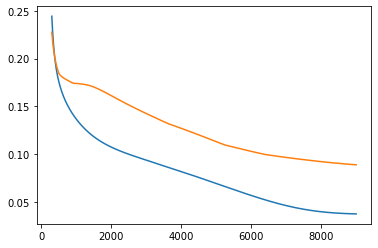

In [162]:
import matplotlib.pyplot as plt
startRange = 300
stopRange = 15000
plt.plot(epochsSteps[startRange:stopRange], train_loss[startRange:stopRange])
plt.plot(epochsSteps[startRange:stopRange], val_loss[startRange:stopRange])
plt.show()

In [163]:
model.eval()
model.cpu()
yTest_pred = model(test_featNPnormal).detach().cpu().numpy()

In [164]:
yTest_pred=yTest_pred[:,0]
yTest_pred.shape

(10000,)

In [166]:
dictionary = {'y': yTest_pred}
df = pd.DataFrame(dictionary)
AbgabeFertig = pd.concat([Abgabe, df], axis=1)
AbgabeFertig=AbgabeFertig.rename(columns={"pid":"Id"})
print(AbgabeFertig)
AbgabeFertig.to_csv(r'C:\Users\erics\Documents\Programme\IntroML\Task4\submissionV1.csv', index=False, header=True)

         Id         y
0     50100  1.829463
1     50101  2.070580
2     50102  1.606741
3     50103  2.385153
4     50104  1.724438
...     ...       ...
9995  60095  2.350605
9996  60096  1.703941
9997  60097  1.650280
9998  60098  1.841922
9999  60099  1.485580

[10000 rows x 2 columns]


First all the data was normalized. Then we trained a 3 layer linear network on the big pretrain dataset. We tried several models and took the smallest one which did work. This way we tried not to overfit too much on the data and allow the hidden layers to find good features.
We then looked at when the validation error would decrease no more and decided to train for 150 Epochs. Then all layers except the last one were frozen and only the last layer was trained on the small dataset. Again we looked at when the validation error would not decrease anymore and trained for 9k epochs (which I must admit was quite a lot).